In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in the dataset

df = pd.read_csv('usda_branded_food_data.csv', low_memory=False)

In [3]:
# list datatypes of all columns in the dataset

for column in df.columns:
    print(f"Column: {column}, Data type: {df[column].dtype}")

Column: FOOD_RECORD_ID, Data type: int64
Column: FOOD_ID, Data type: object
Column: FOOD_NAME, Data type: object
Column: FOOD_SERVING_SIZE, Data type: object
Column: FOOD_INGREDIENTS, Data type: object
Column: ACETIC ACID (MG), Data type: float64
Column: ALANINE (G), Data type: float64
Column: ALCOHOL, ETHYL (G), Data type: float64
Column: ARGININE (G), Data type: float64
Column: ASH (G), Data type: float64
Column: ASPARTIC ACID (G), Data type: float64
Column: BETA-GLUCANS (G), Data type: float64
Column: BIOTIN (UG), Data type: float64
Column: CAFFEINE (MG), Data type: float64
Column: CALCIUM, CA (MG), Data type: float64
Column: CARBOHYDRATE, BY DIFFERENCE (G), Data type: float64
Column: CARBOHYDRATE, OTHER (G), Data type: float64
Column: CAROTENE, BETA (UG), Data type: float64
Column: CHLORINE, CL (MG), Data type: float64
Column: CHOLESTEROL (MG), Data type: float64
Column: CHOLINE, FROM PHOSPHOTIDYL CHOLINE (MG), Data type: float64
Column: CHOLINE, TOTAL (MG), Data type: float64
Colu

In [4]:
# List the min - max for each nutrient column in the dataset

start_column = 'FOOD_INGREDIENTS'
start_index = df.columns.get_loc(start_column) + 1

column_ranges = []

for column in df.columns[start_index:]:
    column_data = df[column]

    if pd.api.types.is_numeric_dtype(column_data):
        min_val = column_data.min()
        max_val = column_data.max()

        if pd.notna(min_val) and pd.notna(max_val):
            range_diff = max_val - min_val
            column_ranges.append((column, min_val, max_val, range_diff))

sorted_column_ranges = sorted(column_ranges, key=lambda x: x[3], reverse=True)

for column, min_val, max_val, _ in sorted_column_ranges:
    print(f"Column: {column}, Range: {min_val} - {max_val}")

Column: VITAMIN B-12 (UG), Range: 0.0 - 65789473.68
Column: VITAMIN D (D2 + D3) (UG), Range: 0.0 - 50000000.0
Column: FOLATE, TOTAL (UG), Range: 0.0 - 38461538.0
Column: FOLIC ACID (UG), Range: 0.0 - 6451613.0
Column: IODINE, I (UG), Range: 0.0 - 4466667.0
Column: VITAMIN A (UG), Range: 0.0 - 4225352.0
Column: VITAMIN D (D2 + D3), INTERNATIONAL UNITS (IU), Range: 0.0 - 3870968.0
Column: VITAMIN A, IU (IU), Range: 0.0 - 331282.0
Column: SELENIUM, SE (UG), Range: 0.0 - 125000.0
Column: CHOLESTEROL (MG), Range: 0.0 - 100000.0
Column: POTASSIUM, K (MG), Range: 0.0 - 100000.0
Column: SODIUM, NA (MG), Range: 0.0 - 100000.0
Column: CALCIUM, CA (MG), Range: 0.0 - 93750.0
Column: BIOTIN (UG), Range: 0.0 - 86957.0
Column: VITAMIN C, TOTAL ASCORBIC ACID (MG), Range: 0.0 - 86718.8
Column: FOLATE, DFE (UG), Range: 0.0 - 70588.0
Column: MAGNESIUM, MG (MG), Range: 0.0 - 65000.0
Column: CHLORINE, CL (MG), Range: 0.0 - 59067.0
Column: VITAMIN E (MG), Range: 0.0 - 51923.0
Column: VITAMIN K (PHYLLOQUINON

In [5]:
# detailed nutrient statistical information

nutrient_columns = df.loc[:, 'FOOD_INGREDIENTS':].columns[1:]

for column in nutrient_columns:
    nutrient_data = df[column].dropna()
    nutrient_data = pd.to_numeric(nutrient_data, errors='coerce').dropna()
    nutrient_data = nutrient_data[nutrient_data != 0]
    
    if not nutrient_data.empty:
        mean = nutrient_data.mean()
        median = nutrient_data.median()
        mode = nutrient_data.mode()[0] if not nutrient_data.mode().empty else None
        min_value = nutrient_data.min()
        max_value = nutrient_data.max()
        std_dev = nutrient_data.std()
        skewness = nutrient_data.skew()
        kurtosis = nutrient_data.kurtosis()
        
        Q1 = nutrient_data.quantile(0.25)
        Q3 = nutrient_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        p10 = nutrient_data.quantile(0.10)
        p90 = nutrient_data.quantile(0.90)
        
        z_scores = (nutrient_data - mean) / std_dev
        outliers = nutrient_data[(z_scores < -3) | (z_scores > 3)]

        print(f'Nutrient: {column}')
        print(f'Mean: {mean:.2f}')
        print(f'Median: {median:.2f}')
        print(f'Mode: {mode:.2f}' if mode is not None else 'Mode: None')
        print(f'Min: {min_value:.2f}')
        print(f'Max: {max_value:.2f}')
        print(f'Standard Deviation: {std_dev:.2f}')
        print(f'Skewness: {skewness:.2f}')
        print(f'Kurtosis: {kurtosis:.2f}')
        print(f'10th Percentile: {p10:.2f}')
        print(f'90th Percentile: {p90:.2f}')
        print(f'IQR: {IQR:.2f}')
        print(f'Lower Bound (Potential Outliers): {lower_bound:.2f}')
        print(f'Upper Bound (Potential Outliers): {upper_bound:.2f}')
        print(f'Outliers (Z-score method): {outliers.tolist()}')
        print('-' * 40)

Nutrient: ACETIC ACID (MG)
Mean: 133.00
Median: 12.00
Mode: 12.00
Min: 12.00
Max: 375.00
Standard Deviation: 209.58
Skewness: 1.73
Kurtosis: nan
10th Percentile: 12.00
90th Percentile: 302.40
IQR: 181.50
Lower Bound (Potential Outliers): -260.25
Upper Bound (Potential Outliers): 465.75
Outliers (Z-score method): []
----------------------------------------
Nutrient: ALANINE (G)
Mean: 3.33
Median: 2.92
Mode: 2.60
Min: 0.28
Max: 16.13
Standard Deviation: 3.19
Skewness: 3.34
Kurtosis: 11.82
10th Percentile: 0.59
90th Percentile: 4.05
IQR: 1.22
Lower Bound (Potential Outliers): 0.47
Upper Bound (Potential Outliers): 5.37
Outliers (Z-score method): [16.129, 16.129, 16.129]
----------------------------------------
Nutrient: ALCOHOL, ETHYL (G)
Mean: 35.83
Median: 13.00
Mode: 7.50
Min: 7.50
Max: 87.00
Standard Deviation: 44.40
Skewness: 1.70
Kurtosis: nan
10th Percentile: 8.60
90th Percentile: 72.20
IQR: 39.75
Lower Bound (Potential Outliers): -49.38
Upper Bound (Potential Outliers): 109.62
Out

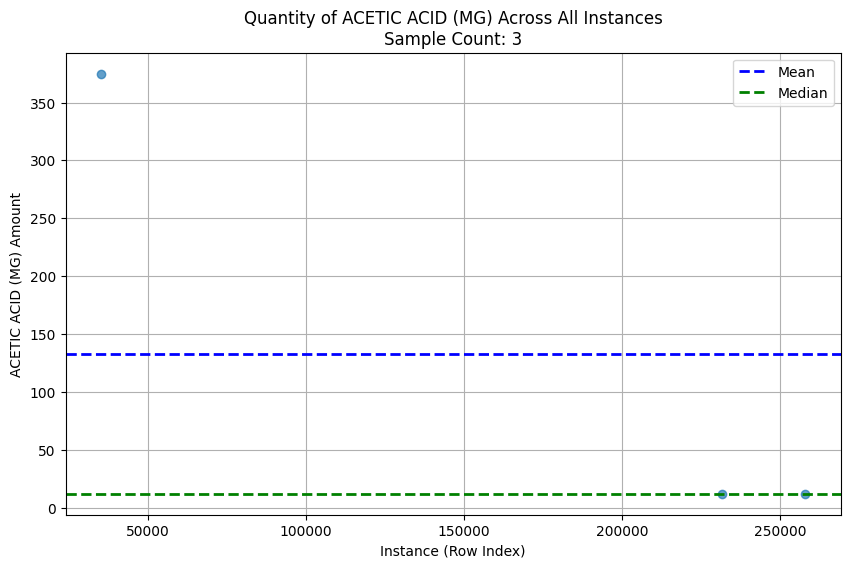

Nutrient: ACETIC ACID (MG)
Mean: 133.00
Median: 12.00
Mode: 12.00
Min: 12.00
Max: 375.00
Standard Deviation: 209.58
Sample Count: 3
------------------------------------------------------------------------------------------------------------------


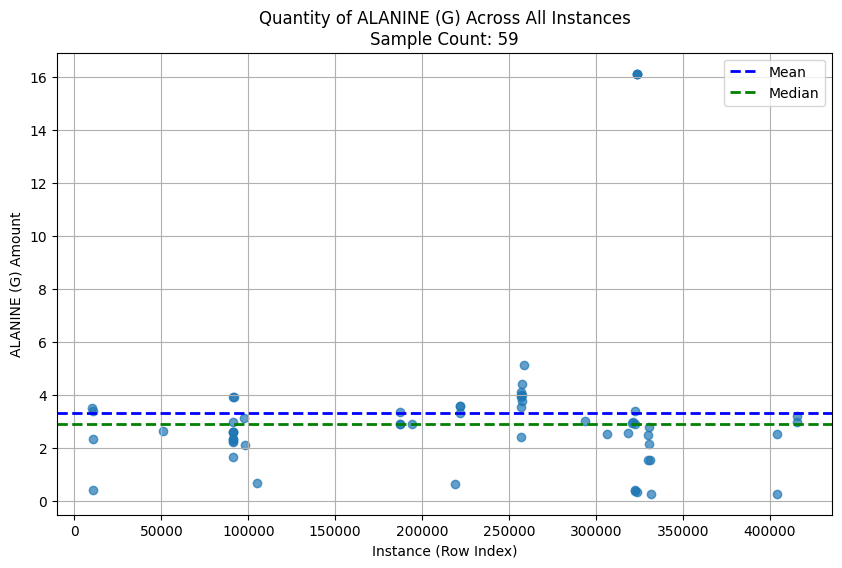

Nutrient: ALANINE (G)
Mean: 3.33
Median: 2.92
Mode: 2.60
Min: 0.28
Max: 16.13
Standard Deviation: 3.19
Sample Count: 59
------------------------------------------------------------------------------------------------------------------


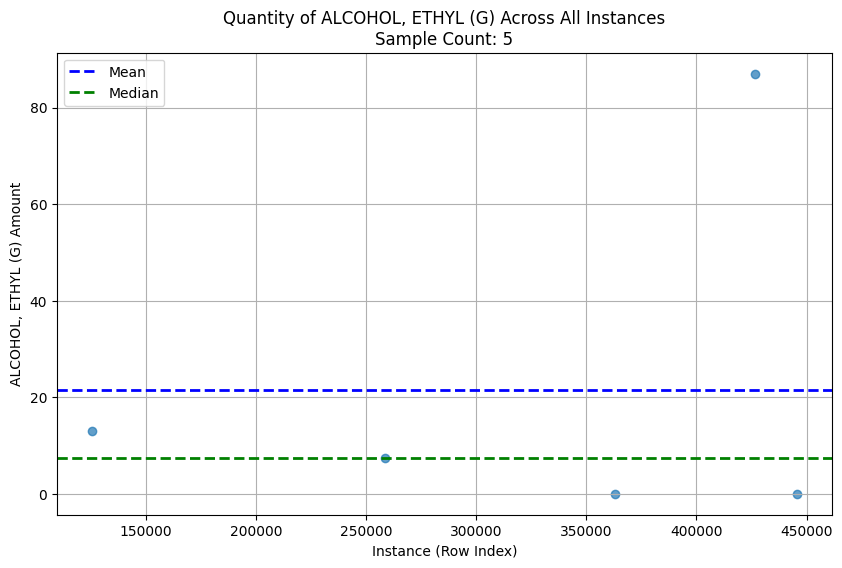

Nutrient: ALCOHOL, ETHYL (G)
Mean: 21.50
Median: 7.50
Mode: 0.00
Min: 0.00
Max: 87.00
Standard Deviation: 37.02
Sample Count: 5
------------------------------------------------------------------------------------------------------------------


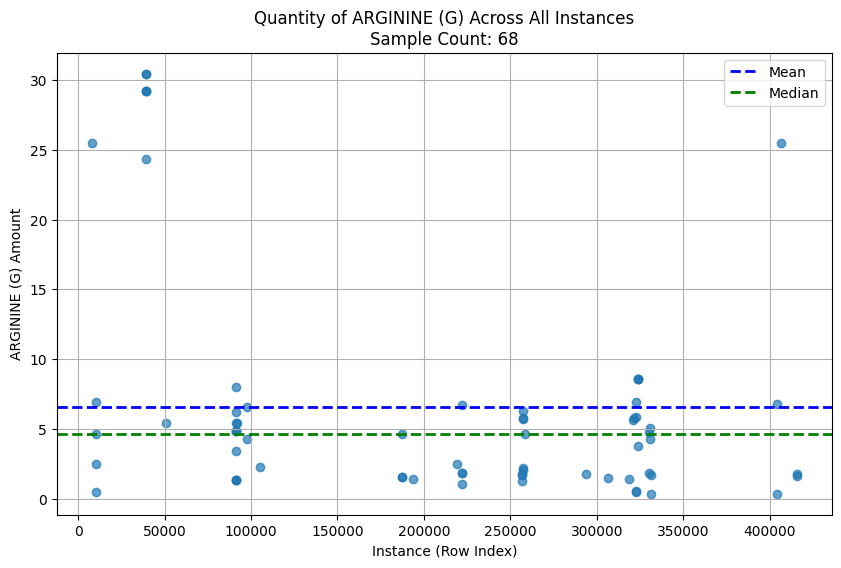

Nutrient: ARGININE (G)
Mean: 6.59
Median: 4.69
Mode: 1.34
Min: 0.39
Max: 30.43
Standard Deviation: 8.21
Sample Count: 68
------------------------------------------------------------------------------------------------------------------


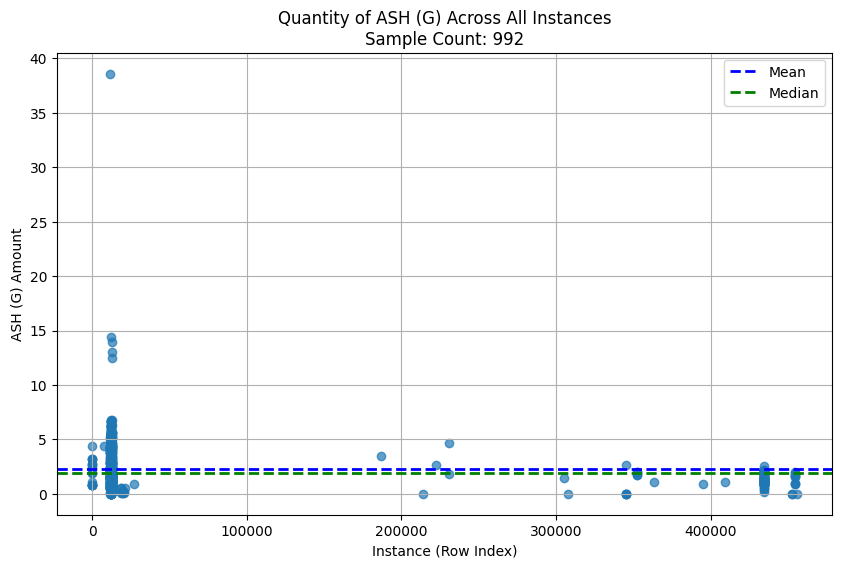

Nutrient: ASH (G)
Mean: 2.31
Median: 1.90
Mode: 1.90
Min: 0.00
Max: 38.60
Standard Deviation: 1.99
Sample Count: 992
------------------------------------------------------------------------------------------------------------------


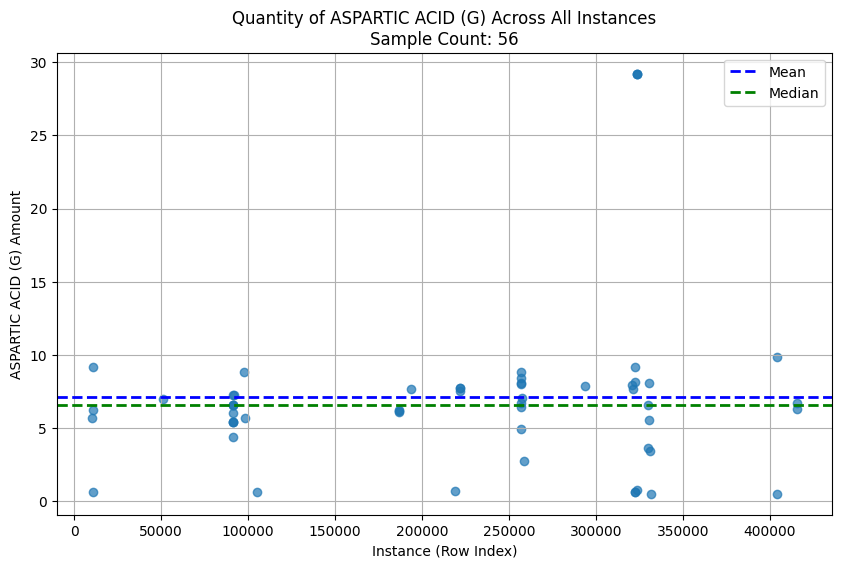

Nutrient: ASPARTIC ACID (G)
Mean: 7.10
Median: 6.56
Mode: 5.45
Min: 0.52
Max: 29.21
Standard Deviation: 5.89
Sample Count: 56
------------------------------------------------------------------------------------------------------------------


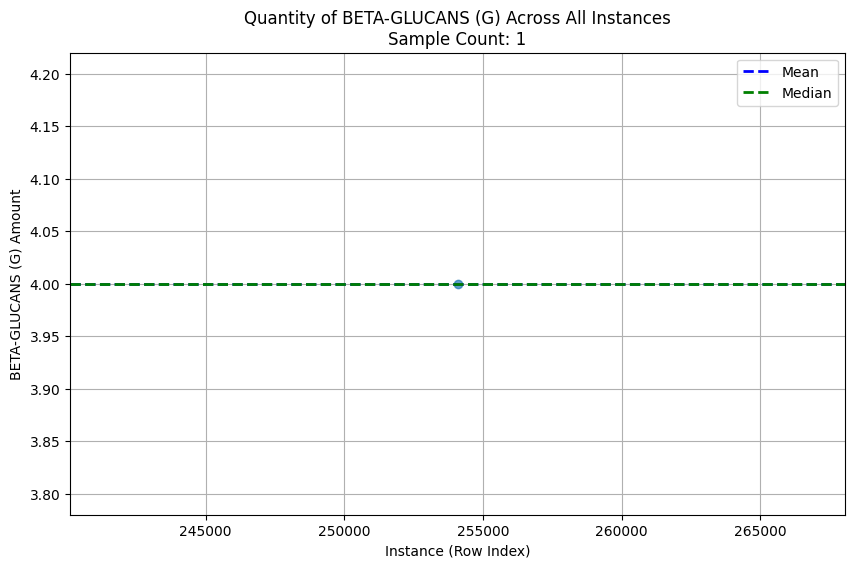

Nutrient: BETA-GLUCANS (G)
Mean: 4.00
Median: 4.00
Mode: 4.00
Min: 4.00
Max: 4.00
Standard Deviation: nan
Sample Count: 1
------------------------------------------------------------------------------------------------------------------


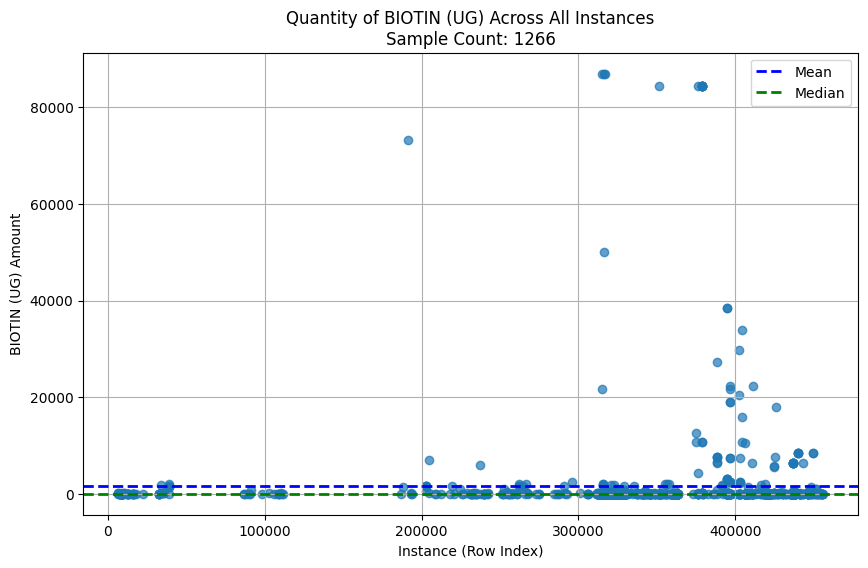

Nutrient: BIOTIN (UG)
Mean: 1495.56
Median: 3.00
Mode: 0.00
Min: 0.00
Max: 86957.00
Standard Deviation: 9056.11
Sample Count: 1266
------------------------------------------------------------------------------------------------------------------


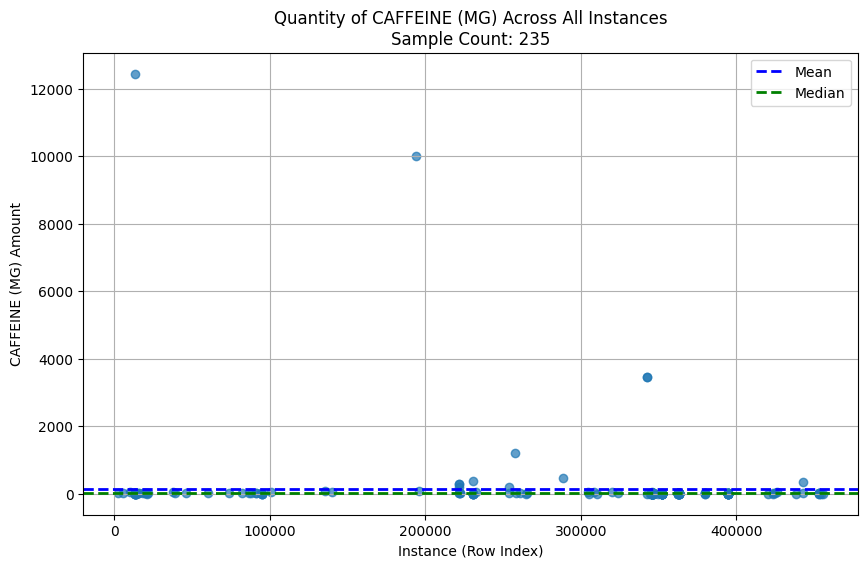

Nutrient: CAFFEINE (MG)
Mean: 149.27
Median: 9.00
Mode: 0.00
Min: 0.00
Max: 12444.00
Standard Deviation: 1085.33
Sample Count: 235
------------------------------------------------------------------------------------------------------------------


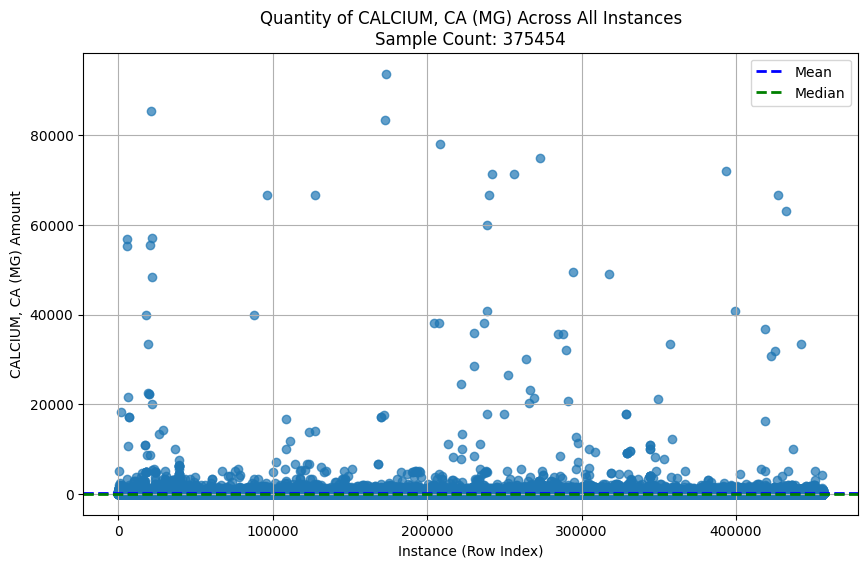

Nutrient: CALCIUM, CA (MG)
Mean: 101.67
Median: 36.00
Mode: 0.00
Min: 0.00
Max: 93750.00
Standard Deviation: 626.53
Sample Count: 375454
------------------------------------------------------------------------------------------------------------------


c:\Users\Jack\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


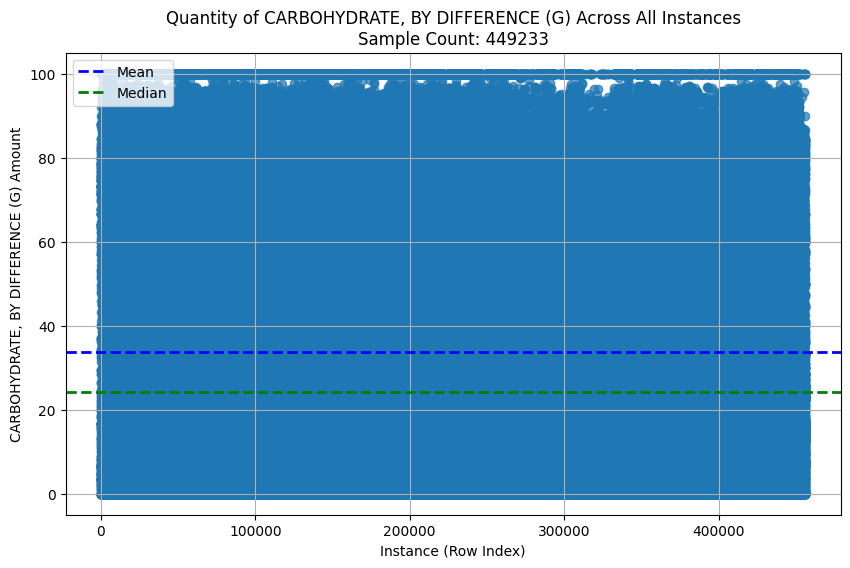

Nutrient: CARBOHYDRATE, BY DIFFERENCE (G)
Mean: 33.65
Median: 24.32
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 29.37
Sample Count: 449233
------------------------------------------------------------------------------------------------------------------


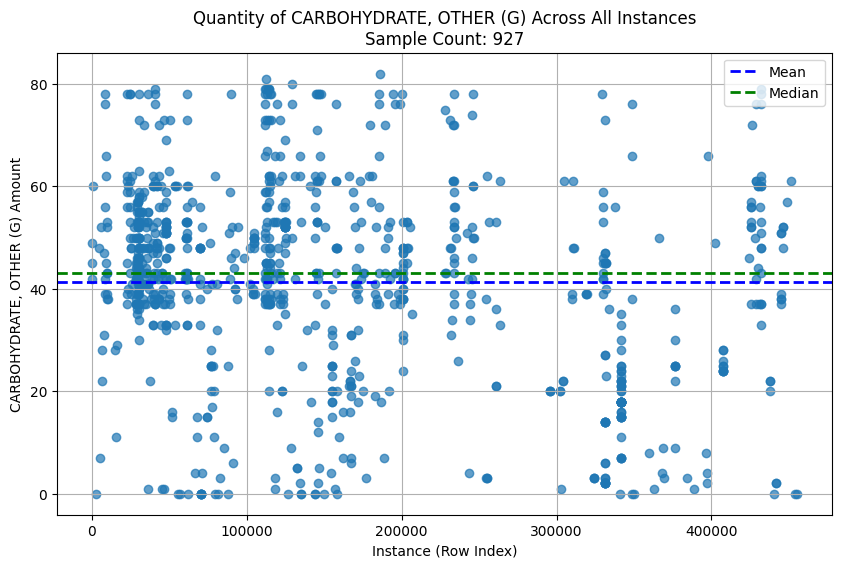

Nutrient: CARBOHYDRATE, OTHER (G)
Mean: 41.42
Median: 43.00
Mode: 48.00
Min: 0.00
Max: 82.00
Standard Deviation: 19.23
Sample Count: 927
------------------------------------------------------------------------------------------------------------------


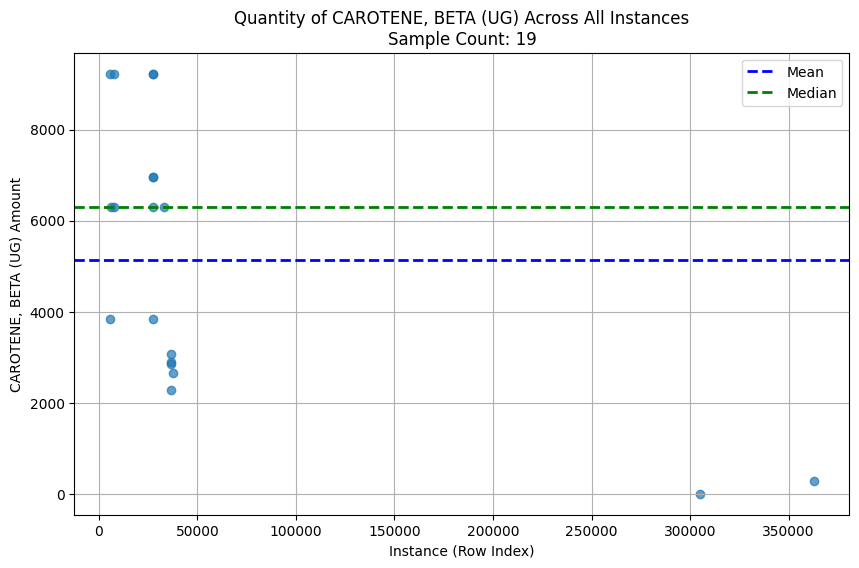

Nutrient: CAROTENE, BETA (UG)
Mean: 5141.63
Median: 6300.00
Mode: 6300.00
Min: 0.00
Max: 9226.00
Standard Deviation: 2993.05
Sample Count: 19
------------------------------------------------------------------------------------------------------------------


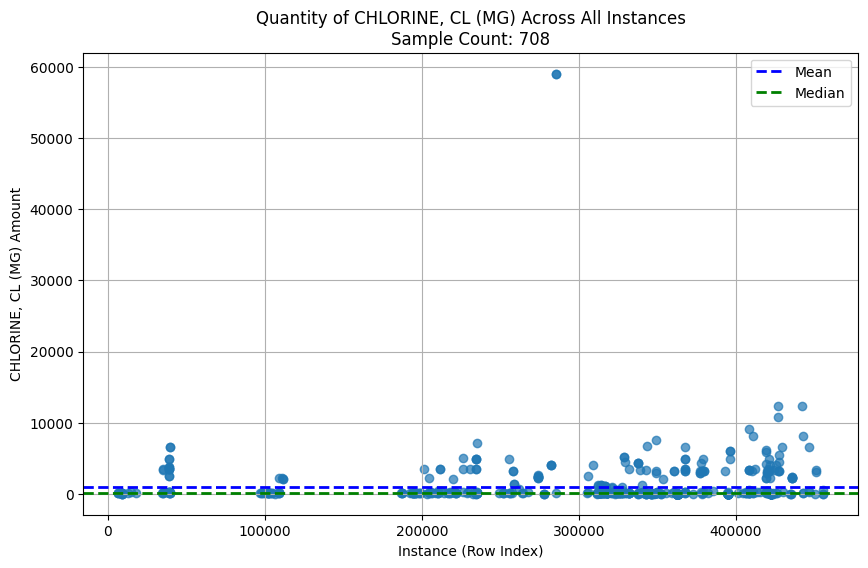

Nutrient: CHLORINE, CL (MG)
Mean: 965.31
Median: 76.00
Mode: 0.00
Min: 0.00
Max: 59067.00
Standard Deviation: 3533.59
Sample Count: 708
------------------------------------------------------------------------------------------------------------------


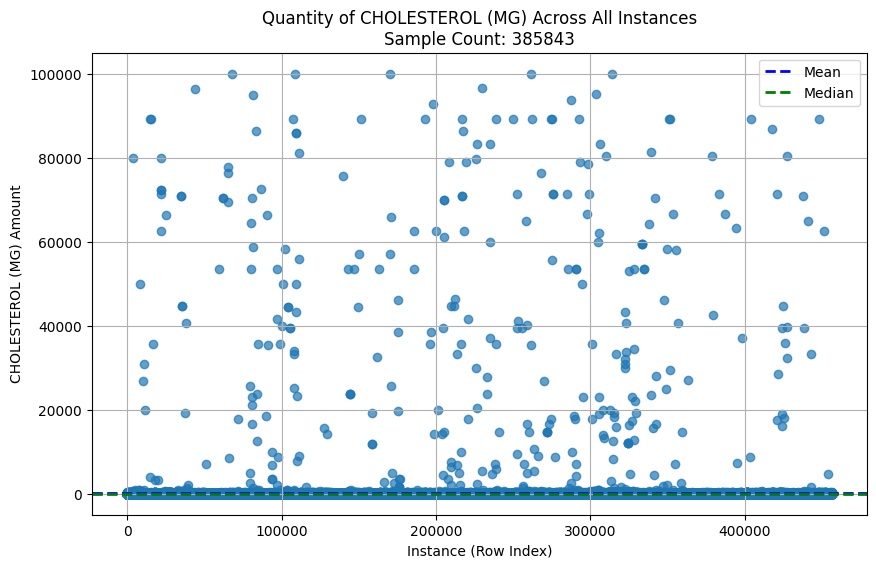

Nutrient: CHOLESTEROL (MG)
Mean: 52.97
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 100000.00
Standard Deviation: 1433.15
Sample Count: 385843
------------------------------------------------------------------------------------------------------------------


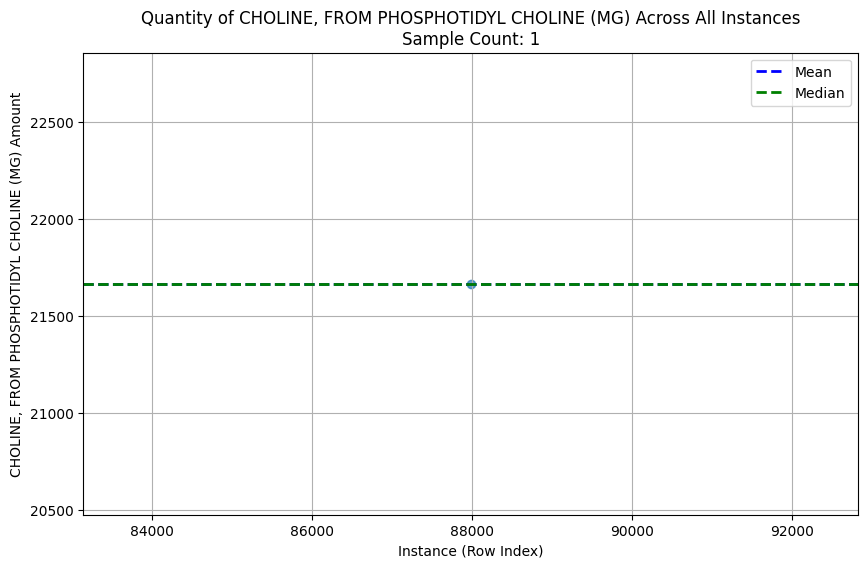

Nutrient: CHOLINE, FROM PHOSPHOTIDYL CHOLINE (MG)
Mean: 21666.70
Median: 21666.70
Mode: 21666.70
Min: 21666.70
Max: 21666.70
Standard Deviation: nan
Sample Count: 1
------------------------------------------------------------------------------------------------------------------


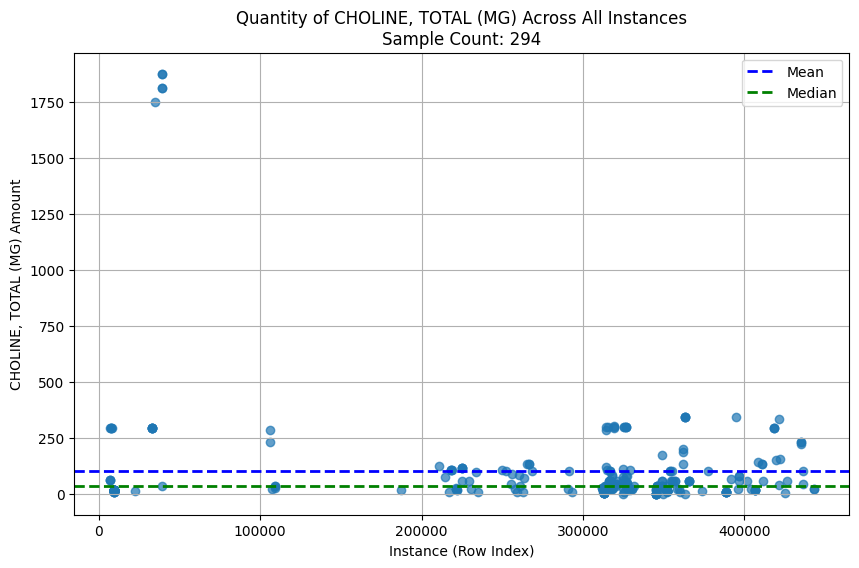

Nutrient: CHOLINE, TOTAL (MG)
Mean: 103.34
Median: 34.00
Mode: 34.00
Min: 0.00
Max: 1875.00
Standard Deviation: 244.67
Sample Count: 294
------------------------------------------------------------------------------------------------------------------


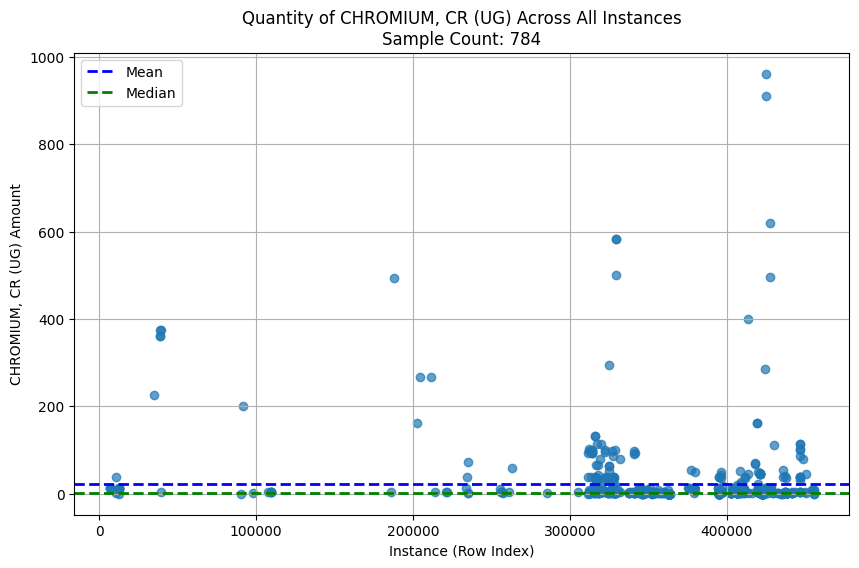

Nutrient: CHROMIUM, CR (UG)
Mean: 21.74
Median: 2.00
Mode: 0.00
Min: 0.00
Max: 962.00
Standard Deviation: 78.51
Sample Count: 784
------------------------------------------------------------------------------------------------------------------


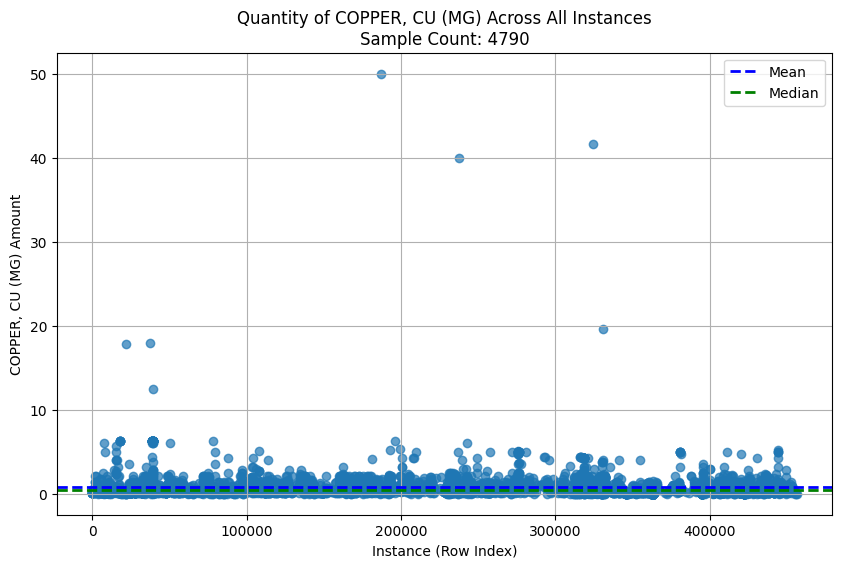

Nutrient: COPPER, CU (MG)
Mean: 0.80
Median: 0.42
Mode: 0.00
Min: 0.00
Max: 50.00
Standard Deviation: 1.53
Sample Count: 4790
------------------------------------------------------------------------------------------------------------------


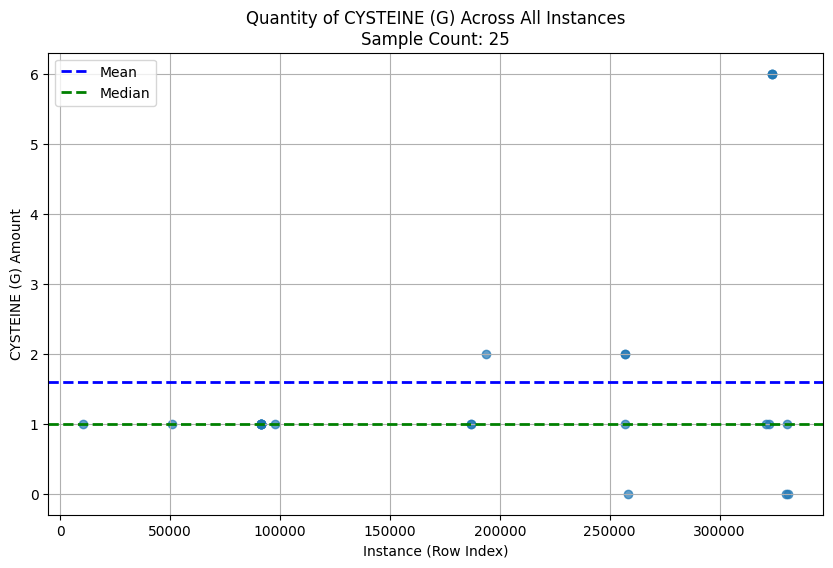

Nutrient: CYSTEINE (G)
Mean: 1.60
Median: 1.00
Mode: 1.00
Min: 0.00
Max: 6.00
Standard Deviation: 1.73
Sample Count: 25
------------------------------------------------------------------------------------------------------------------


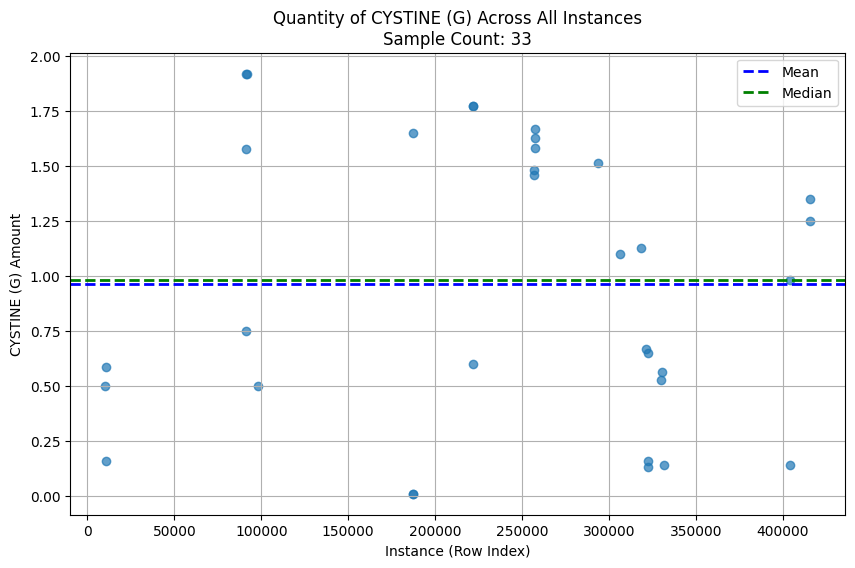

Nutrient: CYSTINE (G)
Mean: 0.96
Median: 0.98
Mode: 0.01
Min: 0.01
Max: 1.92
Standard Deviation: 0.63
Sample Count: 33
------------------------------------------------------------------------------------------------------------------


c:\Users\Jack\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


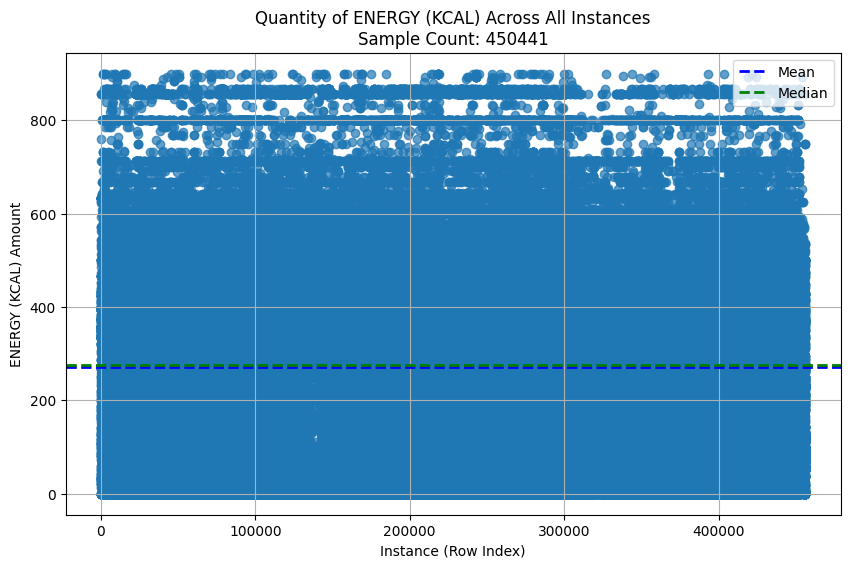

Nutrient: ENERGY (KCAL)
Mean: 270.81
Median: 275.00
Mode: 0.00
Min: 0.00
Max: 900.00
Standard Deviation: 186.96
Sample Count: 450441
------------------------------------------------------------------------------------------------------------------


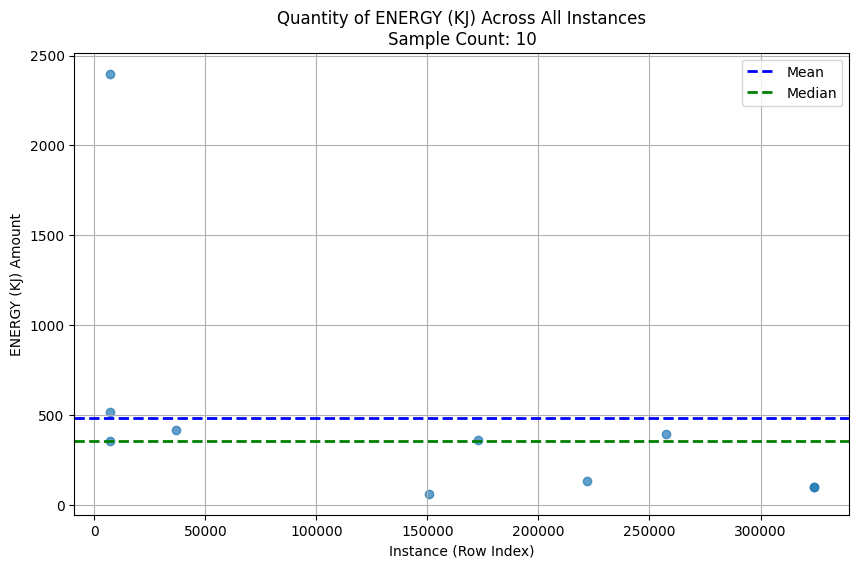

Nutrient: ENERGY (KJ)
Mean: 483.90
Median: 357.50
Mode: 64.00
Min: 64.00
Max: 2399.00
Standard Deviation: 691.81
Sample Count: 10
------------------------------------------------------------------------------------------------------------------


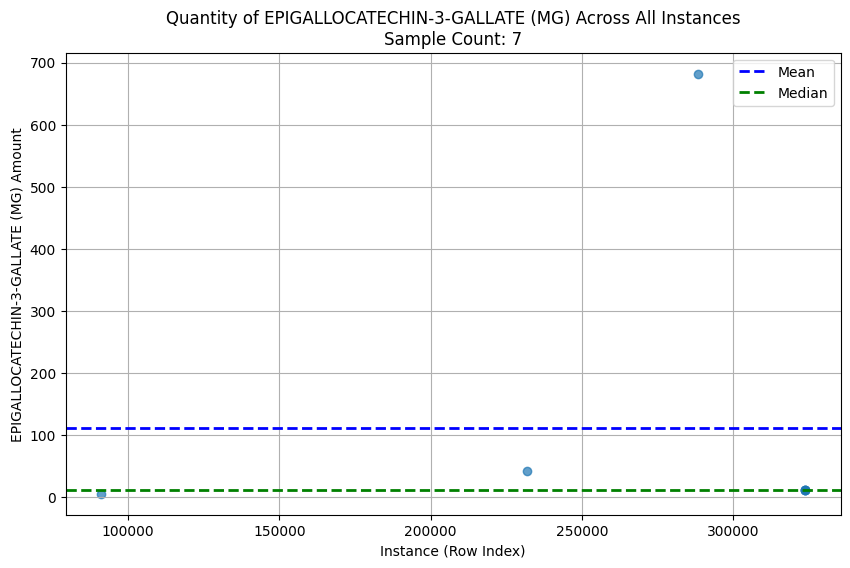

Nutrient: EPIGALLOCATECHIN-3-GALLATE (MG)
Mean: 110.43
Median: 11.00
Mode: 11.00
Min: 5.00
Max: 682.00
Standard Deviation: 252.33
Sample Count: 7
------------------------------------------------------------------------------------------------------------------


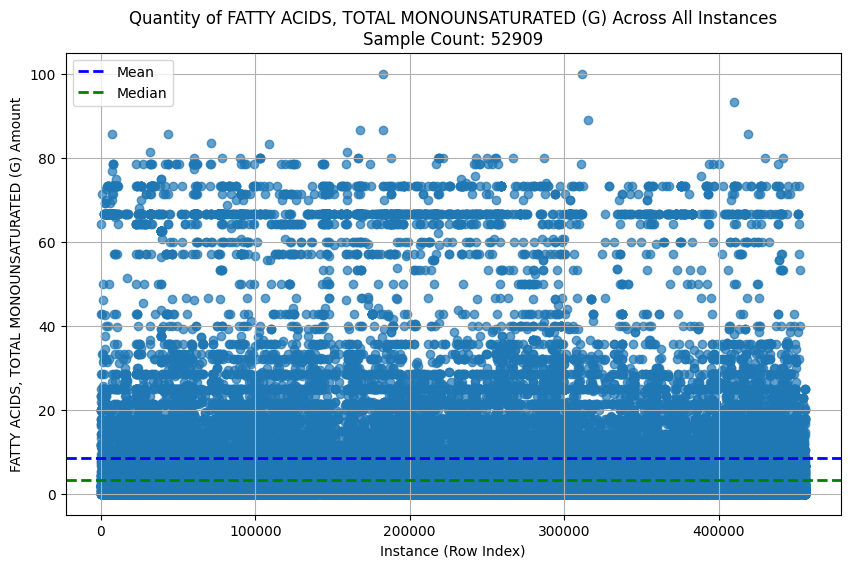

Nutrient: FATTY ACIDS, TOTAL MONOUNSATURATED (G)
Mean: 8.41
Median: 3.33
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 14.27
Sample Count: 52909
------------------------------------------------------------------------------------------------------------------


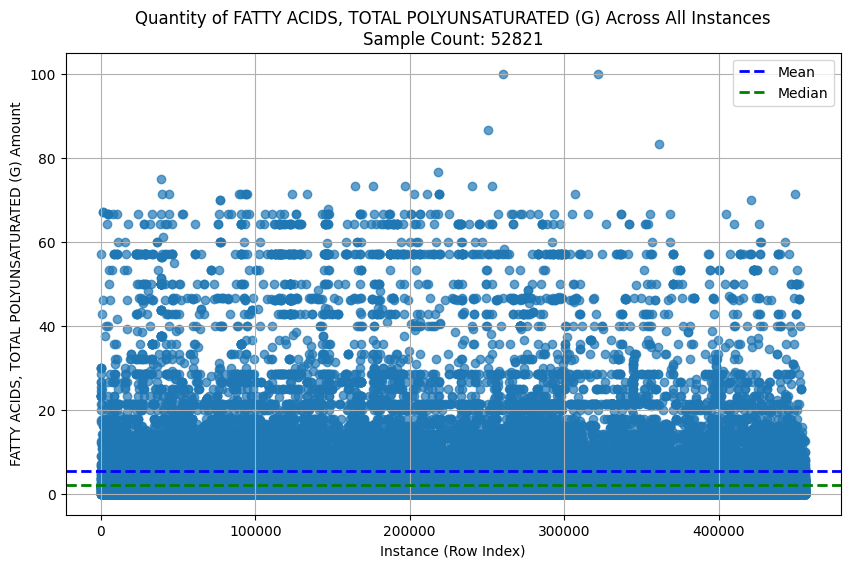

Nutrient: FATTY ACIDS, TOTAL POLYUNSATURATED (G)
Mean: 5.37
Median: 1.96
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 9.43
Sample Count: 52821
------------------------------------------------------------------------------------------------------------------


c:\Users\Jack\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


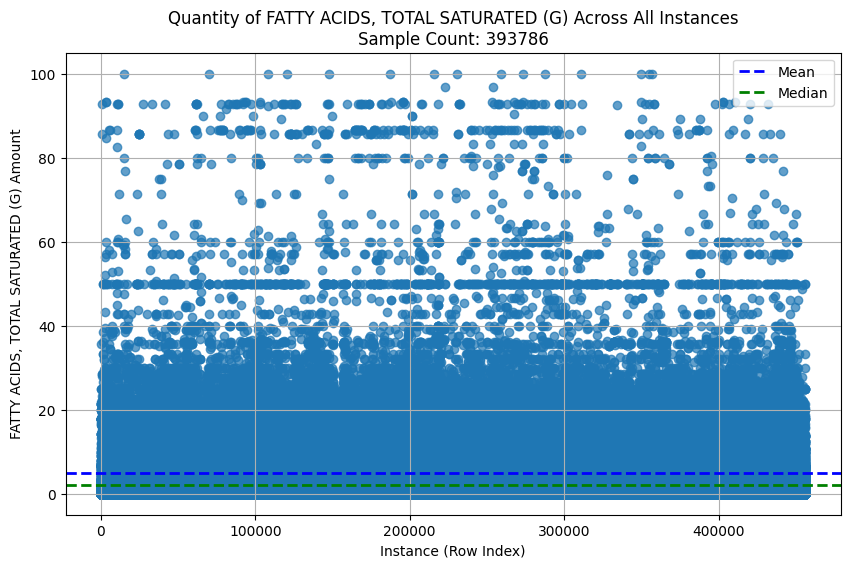

Nutrient: FATTY ACIDS, TOTAL SATURATED (G)
Mean: 4.99
Median: 2.14
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 7.29
Sample Count: 393786
------------------------------------------------------------------------------------------------------------------


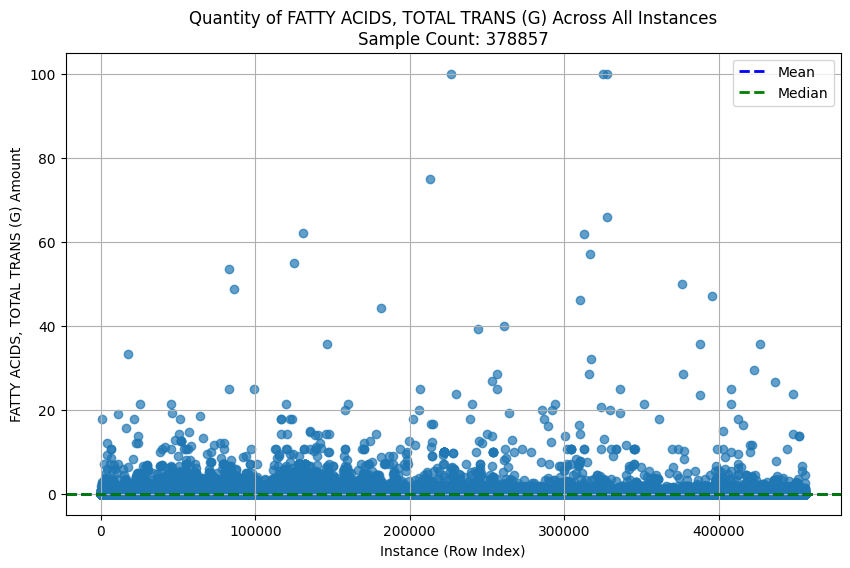

Nutrient: FATTY ACIDS, TOTAL TRANS (G)
Mean: 0.03
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 0.61
Sample Count: 378857
------------------------------------------------------------------------------------------------------------------


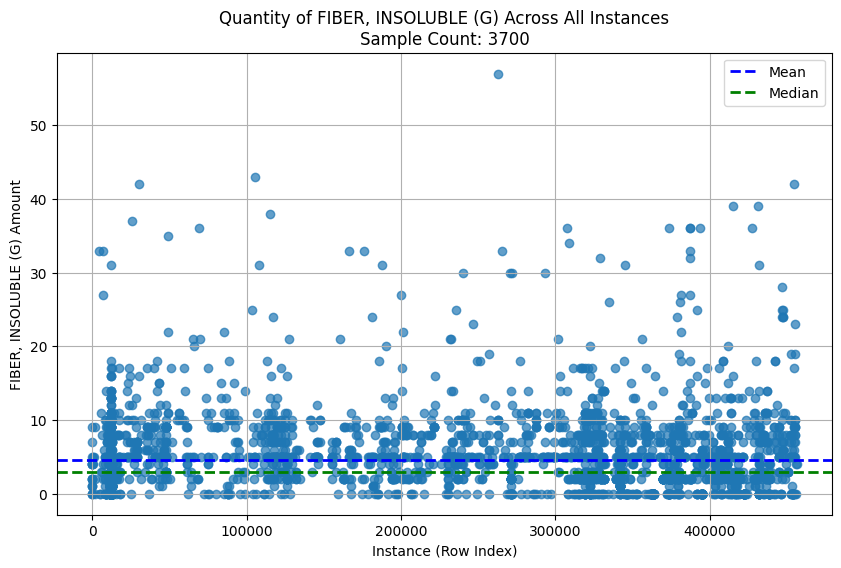

Nutrient: FIBER, INSOLUBLE (G)
Mean: 4.53
Median: 3.00
Mode: 0.00
Min: 0.00
Max: 57.00
Standard Deviation: 5.22
Sample Count: 3700
------------------------------------------------------------------------------------------------------------------


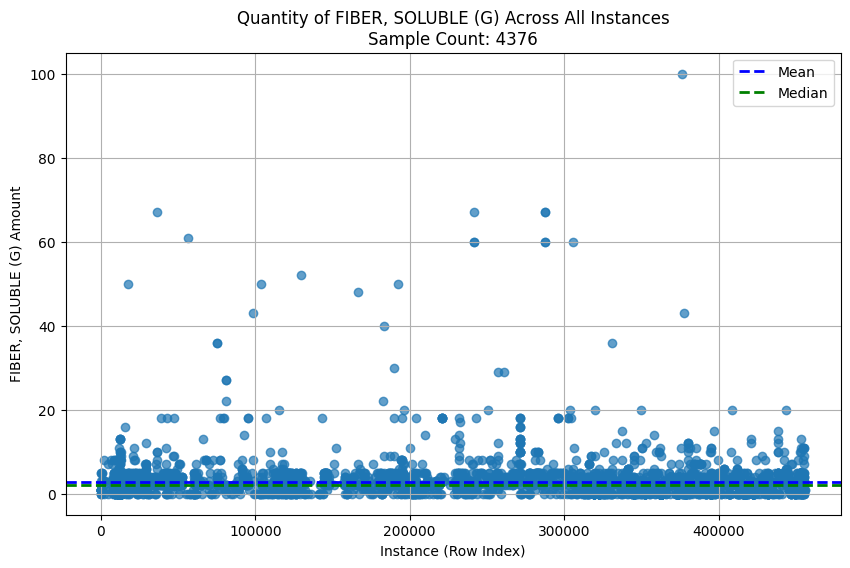

Nutrient: FIBER, SOLUBLE (G)
Mean: 2.81
Median: 2.00
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 4.86
Sample Count: 4376
------------------------------------------------------------------------------------------------------------------


c:\Users\Jack\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


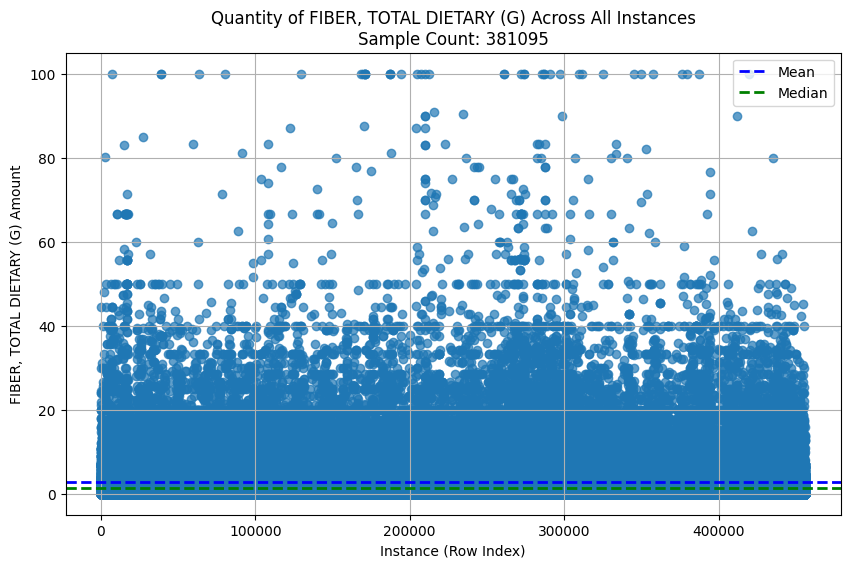

Nutrient: FIBER, TOTAL DIETARY (G)
Mean: 2.86
Median: 1.40
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 4.76
Sample Count: 381095
------------------------------------------------------------------------------------------------------------------


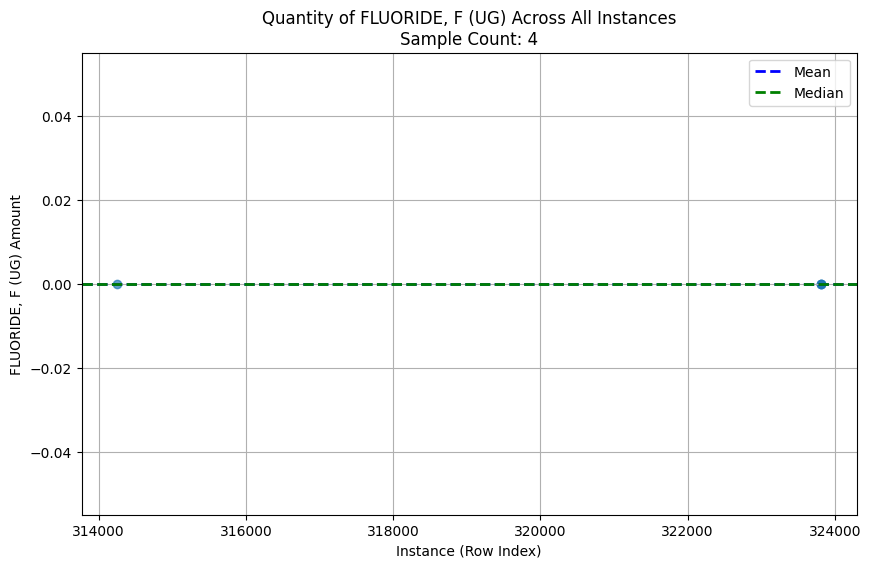

Nutrient: FLUORIDE, F (UG)
Mean: 0.00
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 0.00
Standard Deviation: 0.00
Sample Count: 4
------------------------------------------------------------------------------------------------------------------


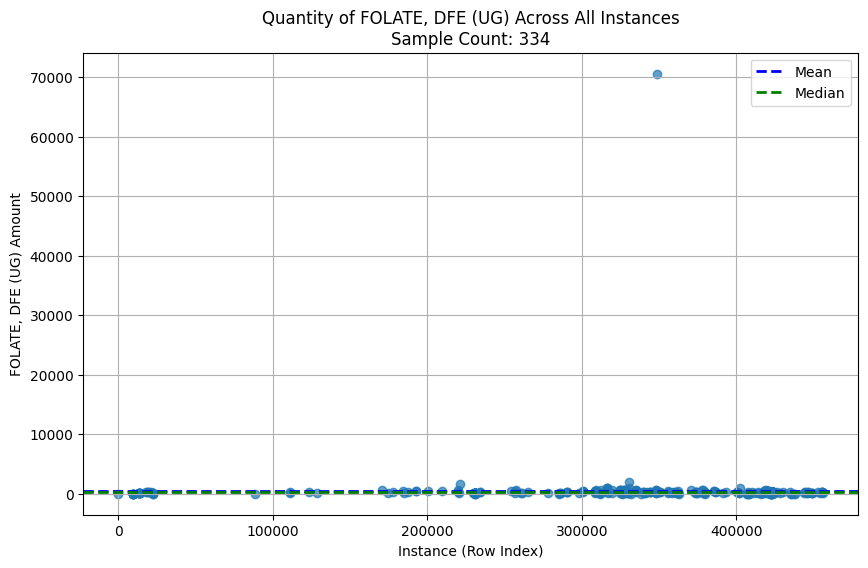

Nutrient: FOLATE, DFE (UG)
Mean: 450.24
Median: 217.00
Mode: 250.00
Min: 0.00
Max: 70588.00
Standard Deviation: 3855.57
Sample Count: 334
------------------------------------------------------------------------------------------------------------------


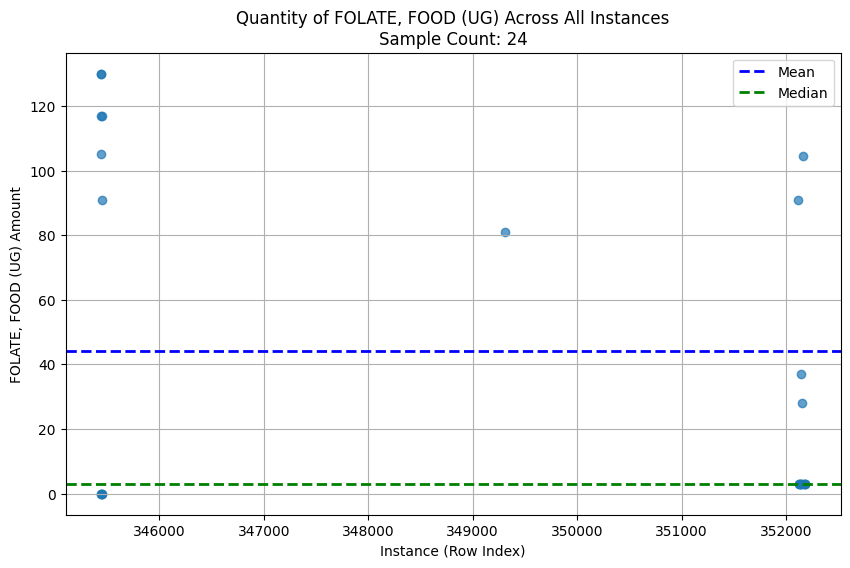

Nutrient: FOLATE, FOOD (UG)
Mean: 44.10
Median: 3.00
Mode: 3.00
Min: 0.00
Max: 130.00
Standard Deviation: 51.83
Sample Count: 24
------------------------------------------------------------------------------------------------------------------


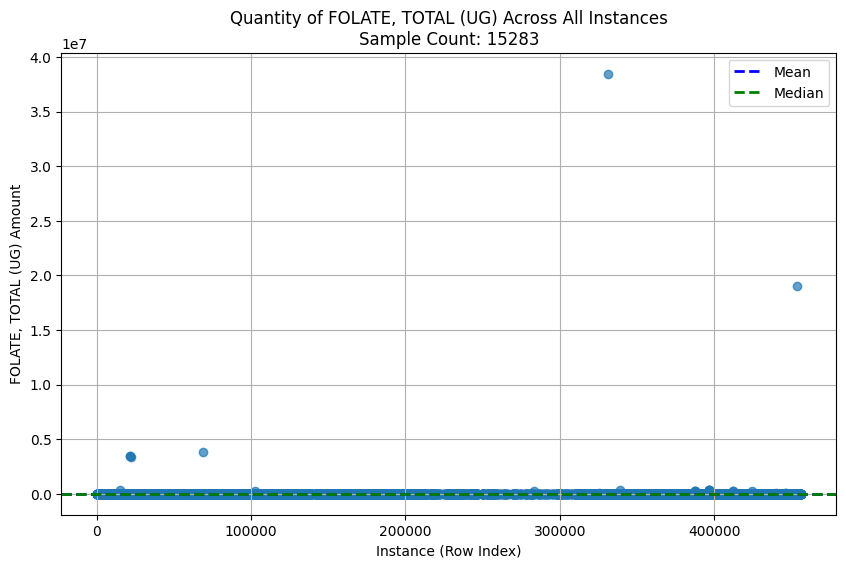

Nutrient: FOLATE, TOTAL (UG)
Mean: 5122.71
Median: 107.00
Mode: 0.00
Min: 0.00
Max: 38461538.00
Standard Deviation: 351746.05
Sample Count: 15283
------------------------------------------------------------------------------------------------------------------


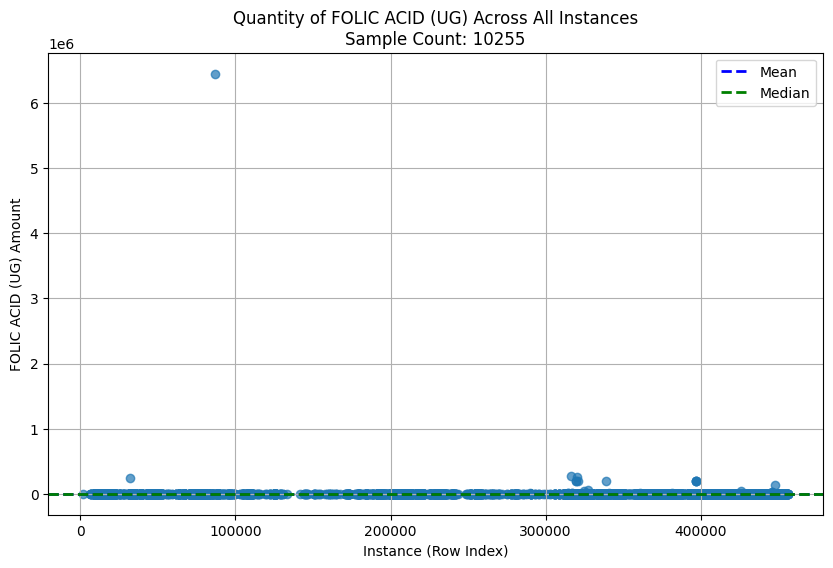

Nutrient: FOLIC ACID (UG)
Mean: 1030.81
Median: 100.00
Mode: 0.00
Min: 0.00
Max: 6451613.00
Standard Deviation: 64110.74
Sample Count: 10255
------------------------------------------------------------------------------------------------------------------


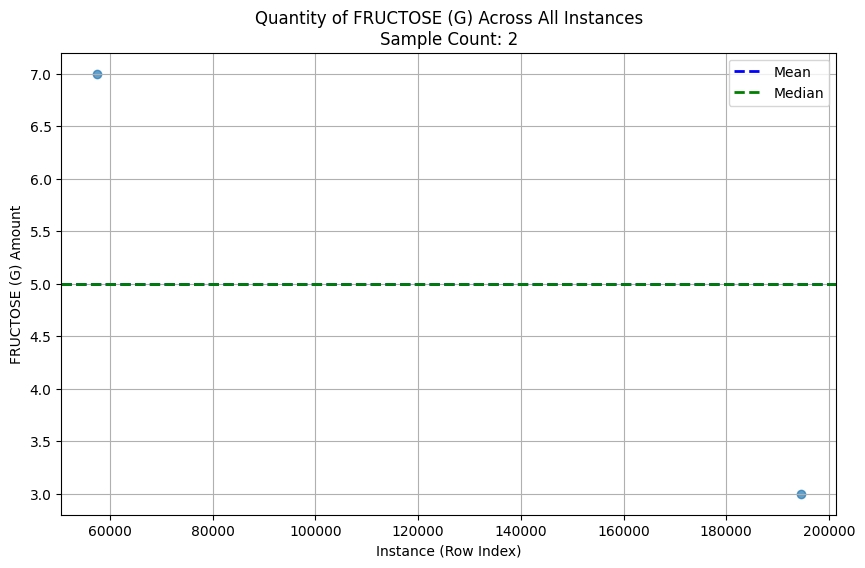

Nutrient: FRUCTOSE (G)
Mean: 5.00
Median: 5.00
Mode: 3.00
Min: 3.00
Max: 7.00
Standard Deviation: 2.83
Sample Count: 2
------------------------------------------------------------------------------------------------------------------


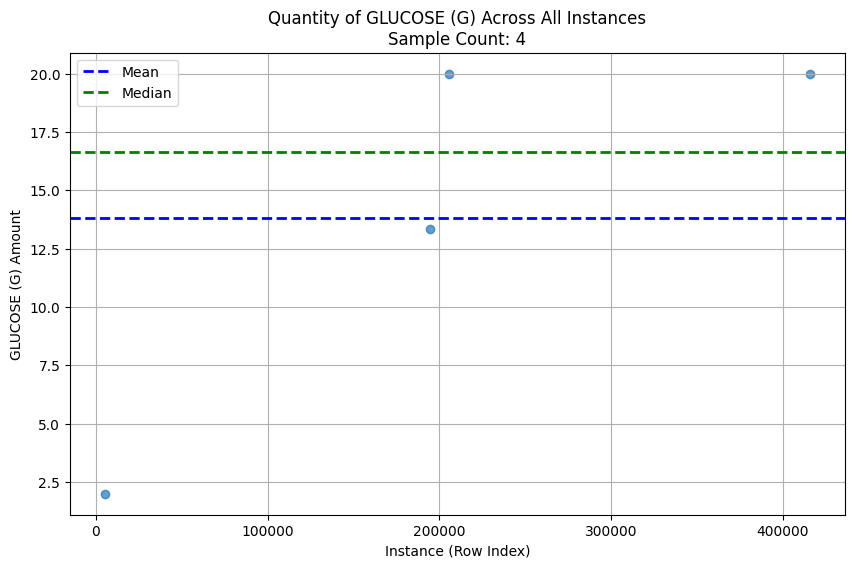

Nutrient: GLUCOSE (G)
Mean: 13.83
Median: 16.66
Mode: 20.00
Min: 2.00
Max: 20.00
Standard Deviation: 8.49
Sample Count: 4
------------------------------------------------------------------------------------------------------------------


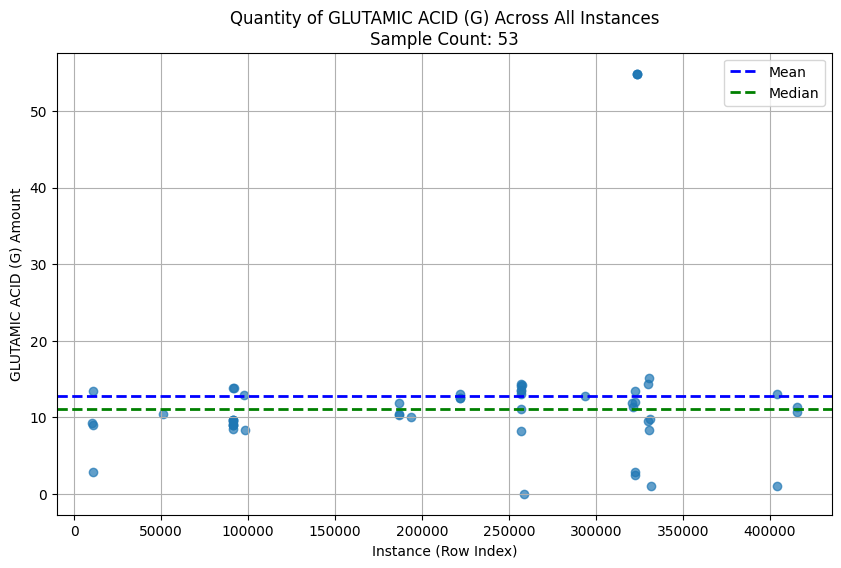

Nutrient: GLUTAMIC ACID (G)
Mean: 12.73
Median: 11.10
Mode: 8.95
Min: 0.01
Max: 54.87
Standard Deviation: 11.04
Sample Count: 53
------------------------------------------------------------------------------------------------------------------


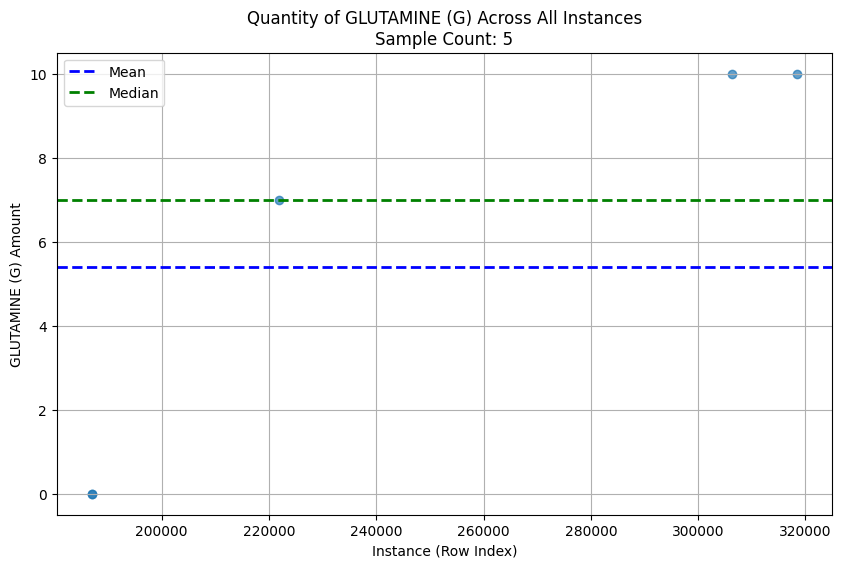

Nutrient: GLUTAMINE (G)
Mean: 5.40
Median: 7.00
Mode: 0.00
Min: 0.00
Max: 10.00
Standard Deviation: 5.08
Sample Count: 5
------------------------------------------------------------------------------------------------------------------


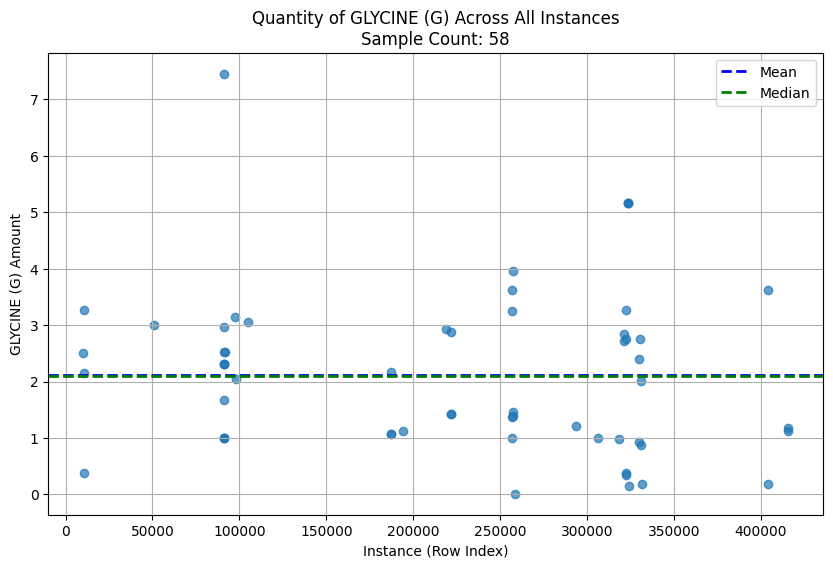

Nutrient: GLYCINE (G)
Mean: 2.12
Median: 2.09
Mode: 1.00
Min: 0.01
Max: 7.45
Standard Deviation: 1.45
Sample Count: 58
------------------------------------------------------------------------------------------------------------------


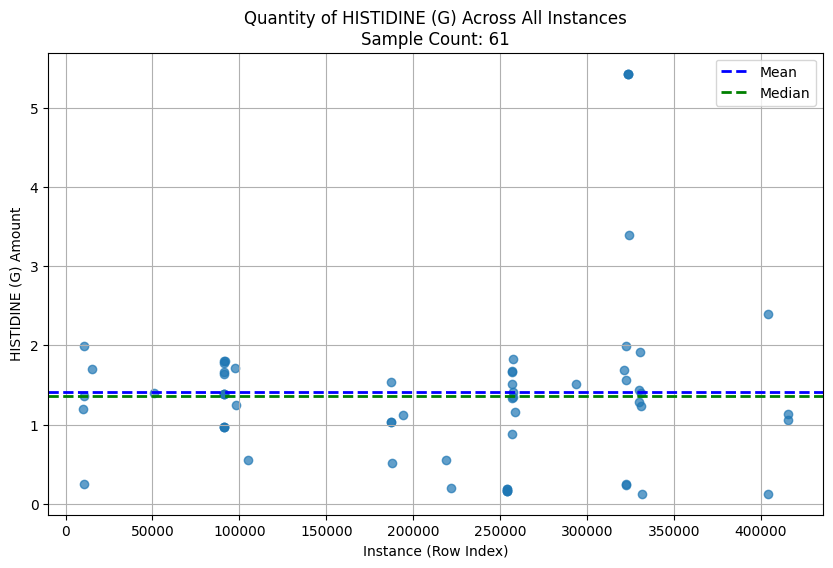

Nutrient: HISTIDINE (G)
Mean: 1.41
Median: 1.37
Mode: 0.97
Min: 0.13
Max: 5.43
Standard Deviation: 1.12
Sample Count: 61
------------------------------------------------------------------------------------------------------------------


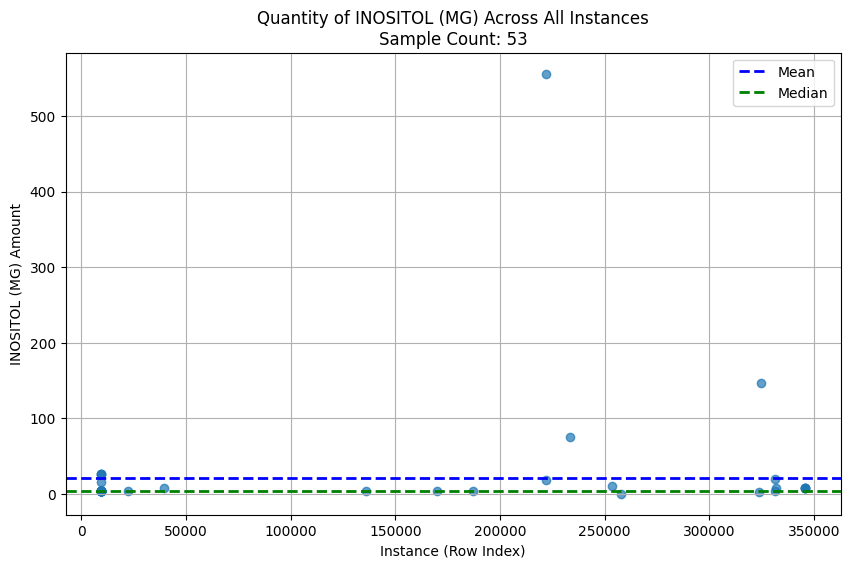

Nutrient: INOSITOL (MG)
Mean: 20.34
Median: 3.00
Mode: 3.00
Min: 0.00
Max: 556.00
Standard Deviation: 78.23
Sample Count: 53
------------------------------------------------------------------------------------------------------------------


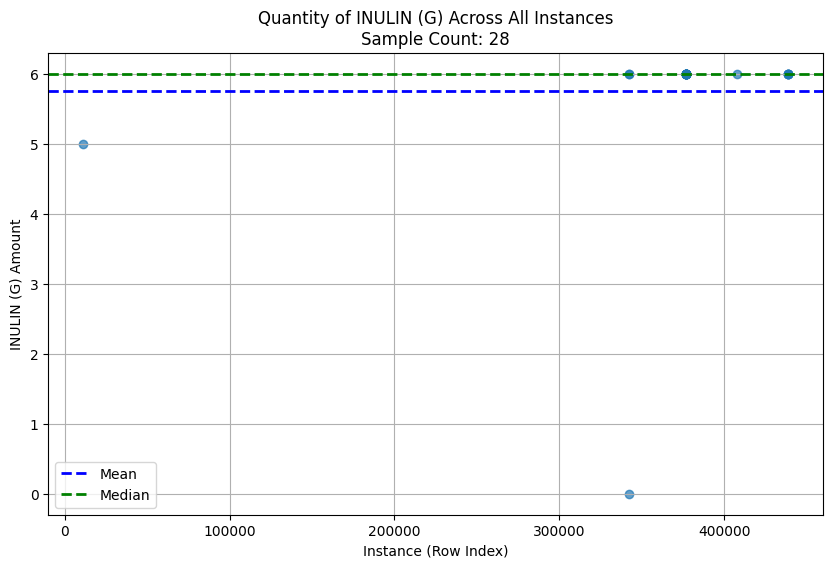

Nutrient: INULIN (G)
Mean: 5.75
Median: 6.00
Mode: 6.00
Min: 0.00
Max: 6.00
Standard Deviation: 1.14
Sample Count: 28
------------------------------------------------------------------------------------------------------------------


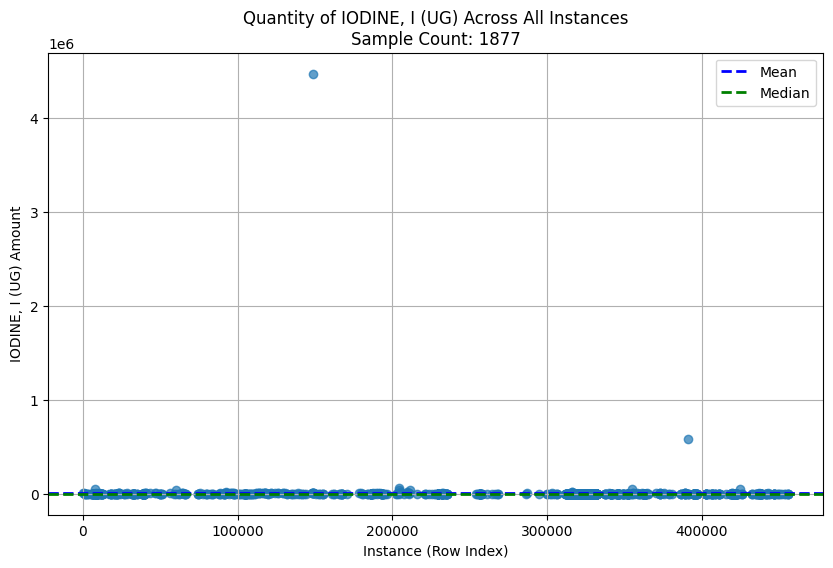

Nutrient: IODINE, I (UG)
Mean: 3199.80
Median: 16.00
Mode: 0.00
Min: 0.00
Max: 4466667.00
Standard Deviation: 104012.00
Sample Count: 1877
------------------------------------------------------------------------------------------------------------------


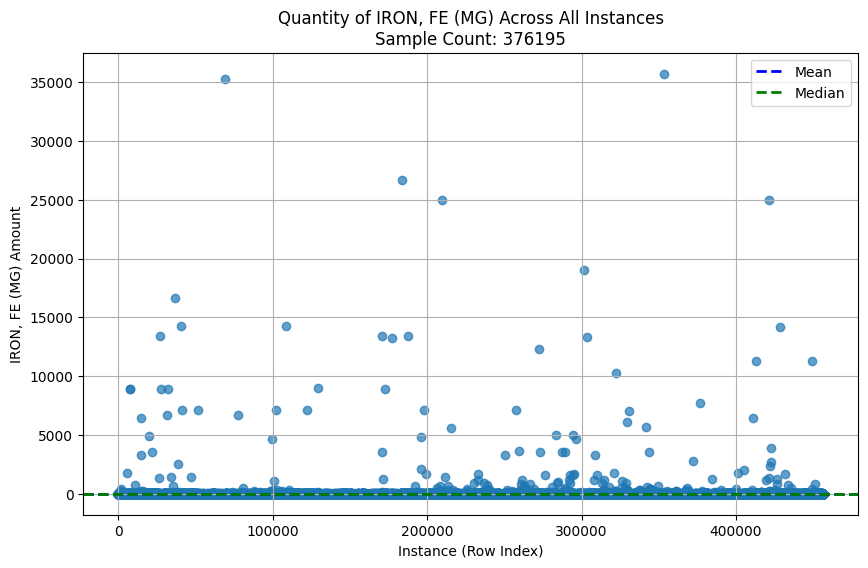

Nutrient: IRON, FE (MG)
Mean: 3.59
Median: 1.00
Mode: 0.00
Min: 0.00
Max: 35714.29
Standard Deviation: 152.01
Sample Count: 376195
------------------------------------------------------------------------------------------------------------------


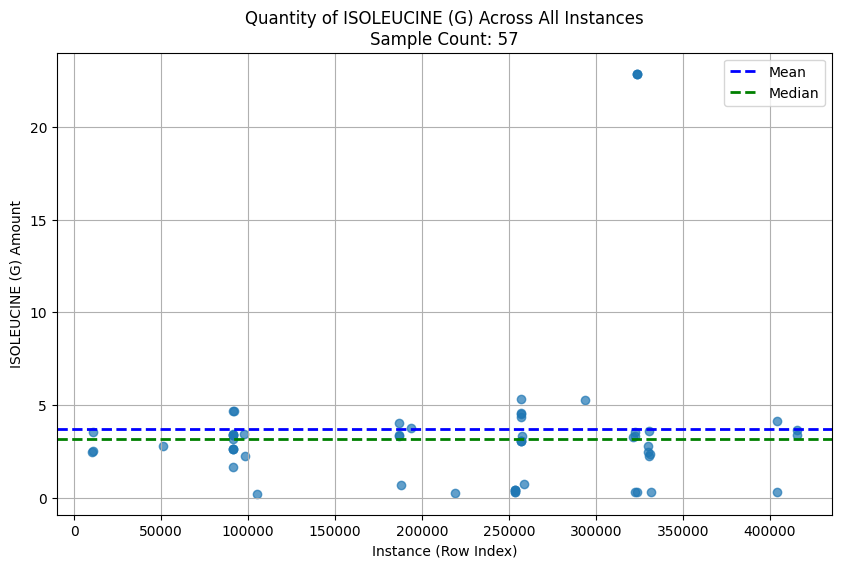

Nutrient: ISOLEUCINE (G)
Mean: 3.73
Median: 3.16
Mode: 2.61
Min: 0.23
Max: 22.87
Standard Deviation: 4.77
Sample Count: 57
------------------------------------------------------------------------------------------------------------------


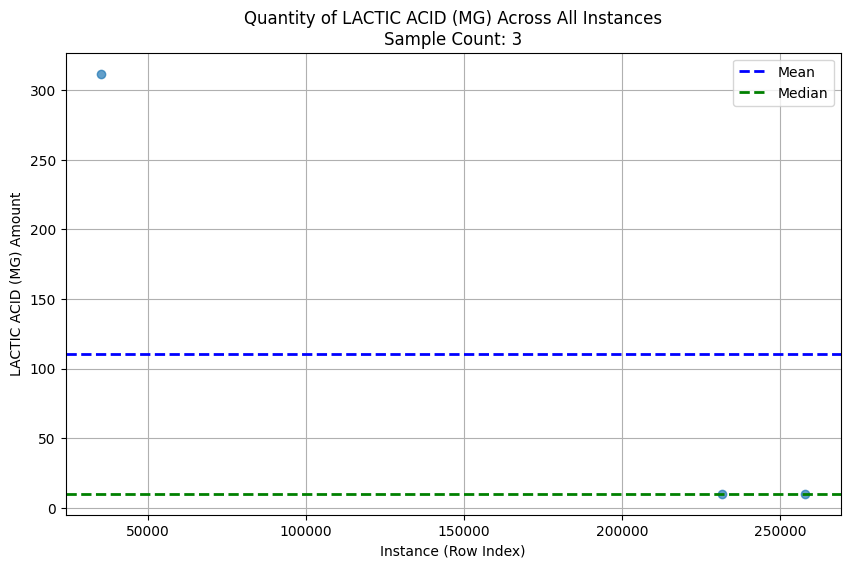

Nutrient: LACTIC ACID (MG)
Mean: 110.67
Median: 10.00
Mode: 10.00
Min: 10.00
Max: 312.00
Standard Deviation: 174.36
Sample Count: 3
------------------------------------------------------------------------------------------------------------------


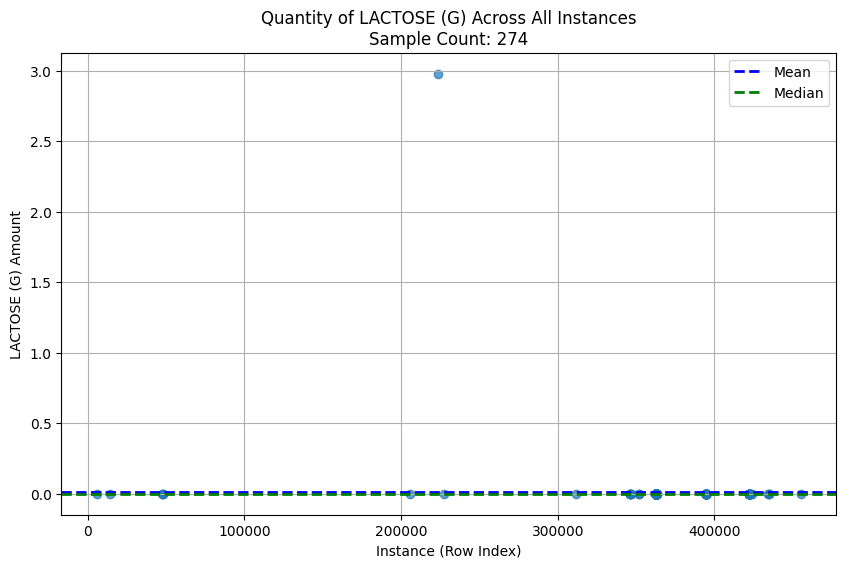

Nutrient: LACTOSE (G)
Mean: 0.01
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 2.98
Standard Deviation: 0.18
Sample Count: 274
------------------------------------------------------------------------------------------------------------------


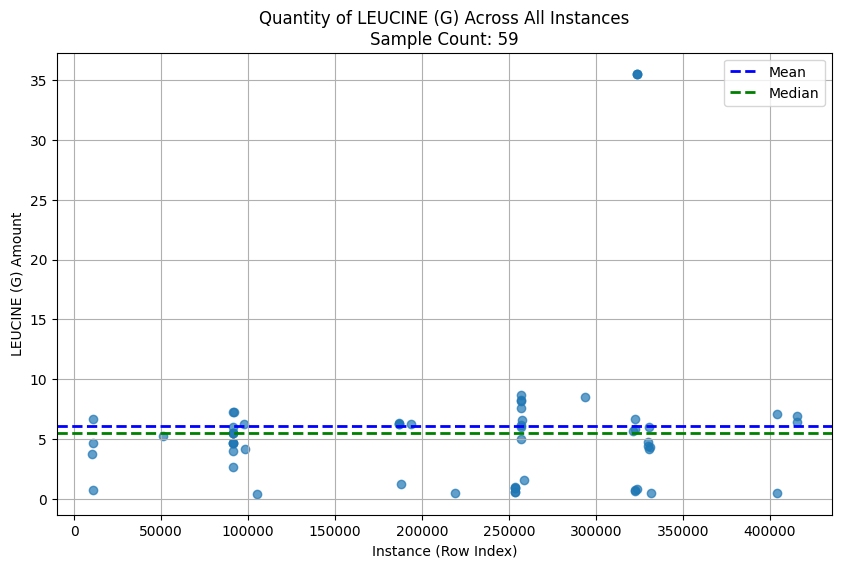

Nutrient: LEUCINE (G)
Mean: 6.10
Median: 5.50
Mode: 4.69
Min: 0.45
Max: 35.52
Standard Deviation: 7.31
Sample Count: 59
------------------------------------------------------------------------------------------------------------------


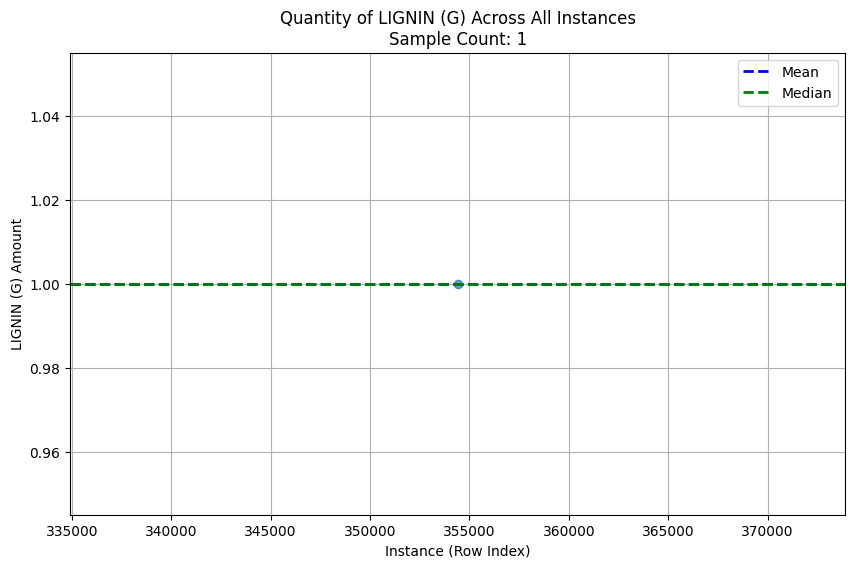

Nutrient: LIGNIN (G)
Mean: 1.00
Median: 1.00
Mode: 1.00
Min: 1.00
Max: 1.00
Standard Deviation: nan
Sample Count: 1
------------------------------------------------------------------------------------------------------------------


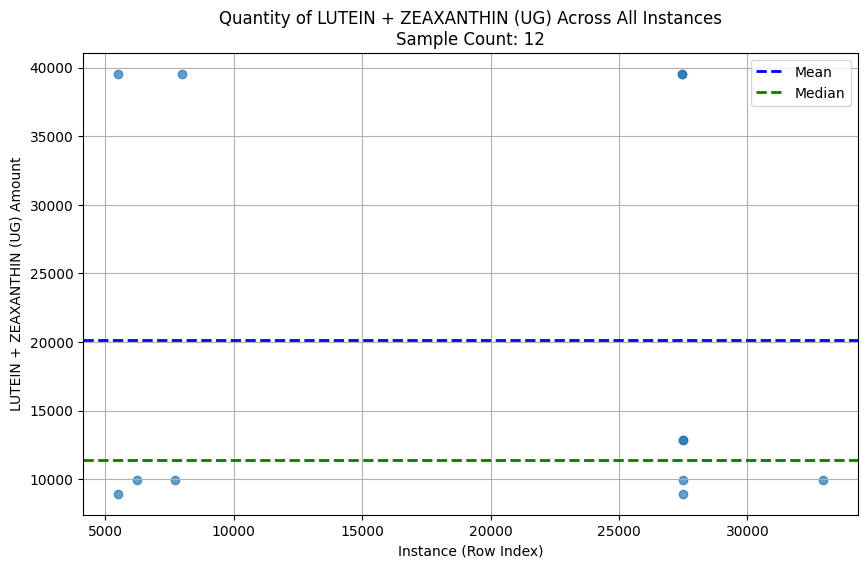

Nutrient: LUTEIN + ZEAXANTHIN (UG)
Mean: 20109.50
Median: 11361.50
Mode: 9900.00
Min: 8934.00
Max: 39550.00
Standard Deviation: 14411.60
Sample Count: 12
------------------------------------------------------------------------------------------------------------------


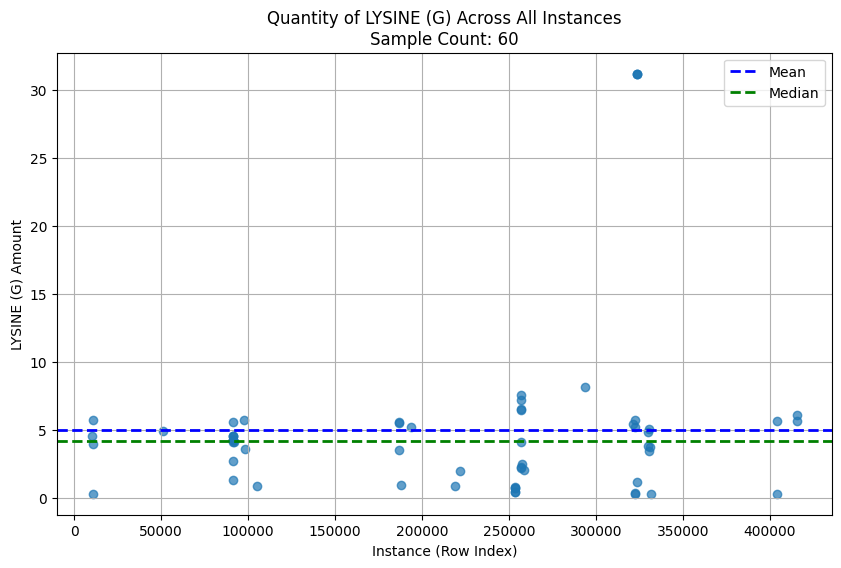

Nutrient: LYSINE (G)
Mean: 4.99
Median: 4.16
Mode: 4.22
Min: 0.29
Max: 31.18
Standard Deviation: 6.42
Sample Count: 60
------------------------------------------------------------------------------------------------------------------


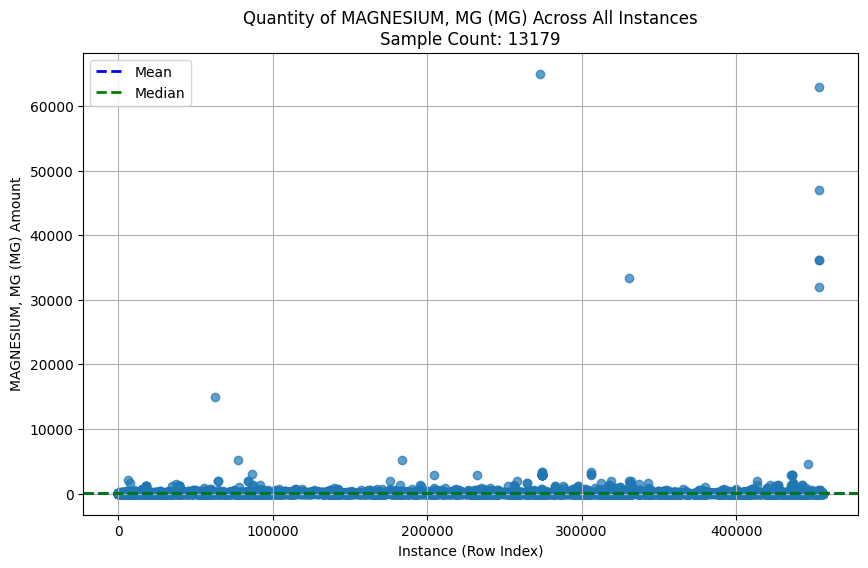

Nutrient: MAGNESIUM, MG (MG)
Mean: 135.73
Median: 57.00
Mode: 0.00
Min: 0.00
Max: 65000.00
Standard Deviation: 1100.96
Sample Count: 13179
------------------------------------------------------------------------------------------------------------------


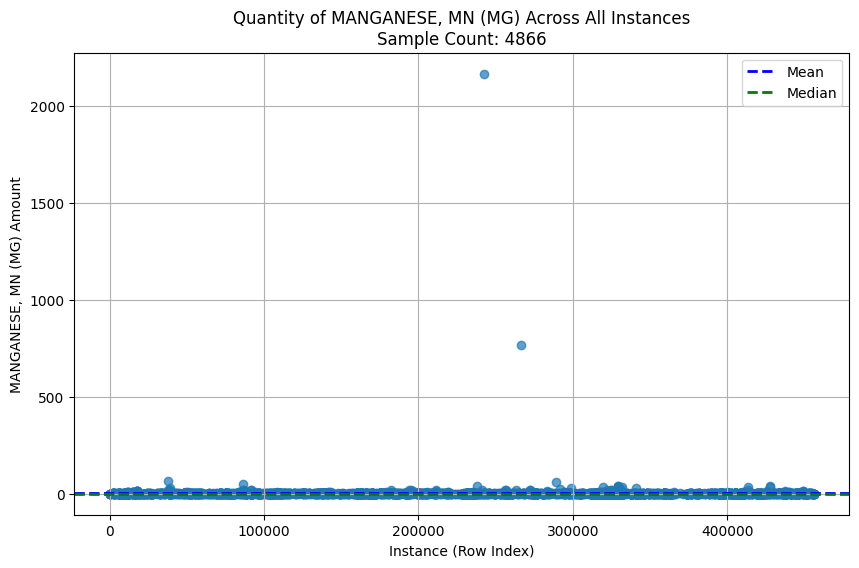

Nutrient: MANGANESE, MN (MG)
Mean: 2.08
Median: 1.00
Mode: 0.00
Min: 0.00
Max: 2167.00
Standard Deviation: 33.08
Sample Count: 4866
------------------------------------------------------------------------------------------------------------------


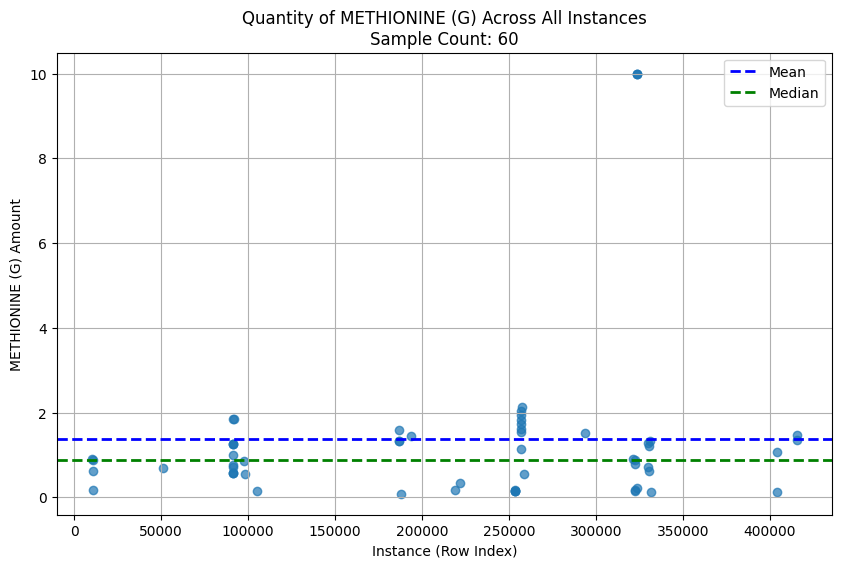

Nutrient: METHIONINE (G)
Mean: 1.37
Median: 0.89
Mode: 0.58
Min: 0.09
Max: 10.00
Standard Deviation: 2.08
Sample Count: 60
------------------------------------------------------------------------------------------------------------------


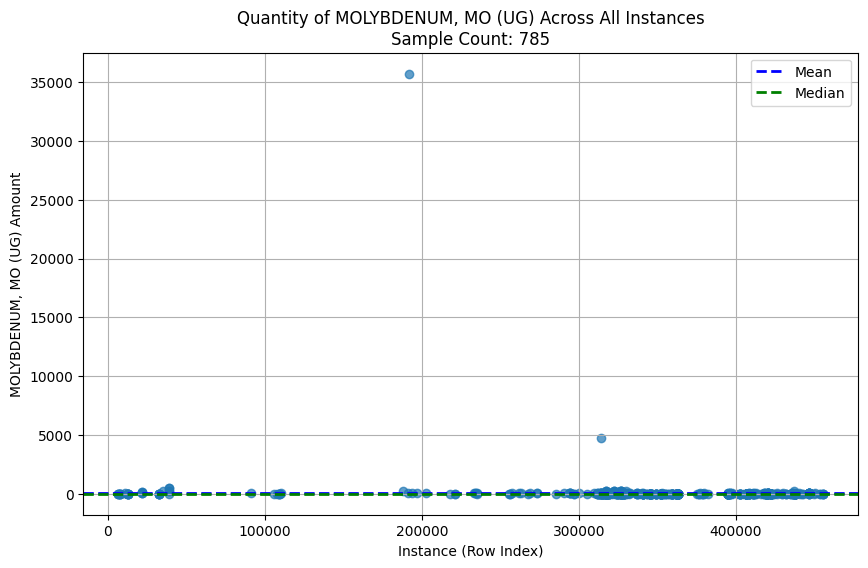

Nutrient: MOLYBDENUM, MO (UG)
Mean: 69.35
Median: 3.00
Mode: 0.00
Min: 0.00
Max: 35714.00
Standard Deviation: 1285.86
Sample Count: 785
------------------------------------------------------------------------------------------------------------------


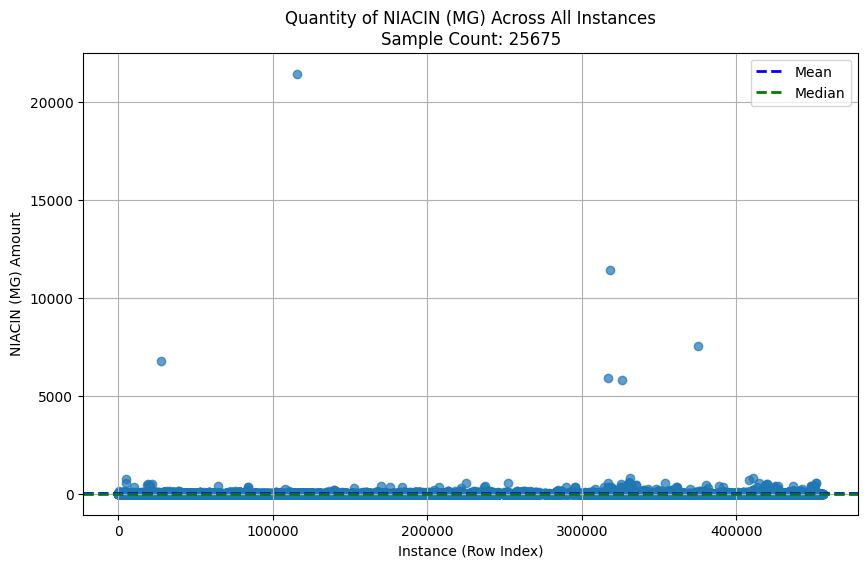

Nutrient: NIACIN (MG)
Mean: 12.52
Median: 5.00
Mode: 7.14
Min: 0.00
Max: 21428.57
Standard Deviation: 174.84
Sample Count: 25675
------------------------------------------------------------------------------------------------------------------


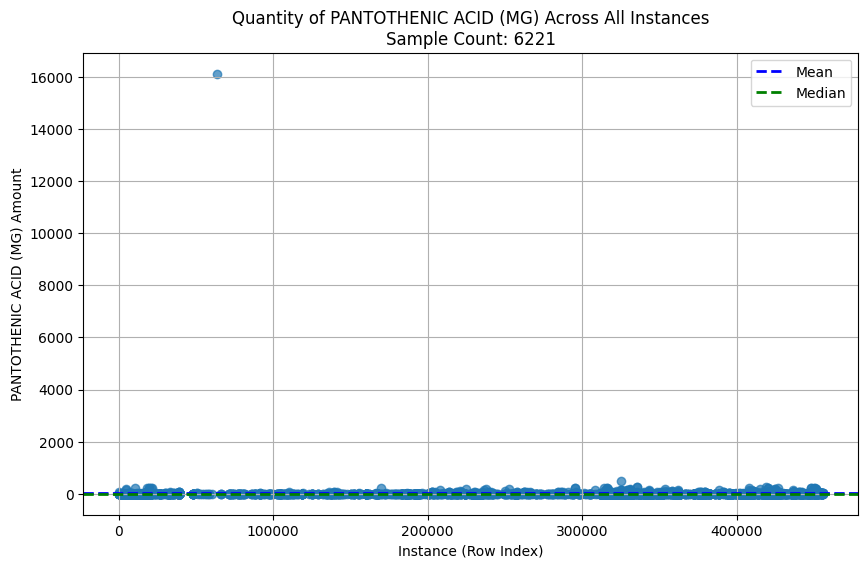

Nutrient: PANTOTHENIC ACID (MG)
Mean: 8.82
Median: 1.02
Mode: 0.00
Min: 0.00
Max: 16129.03
Standard Deviation: 205.72
Sample Count: 6221
------------------------------------------------------------------------------------------------------------------


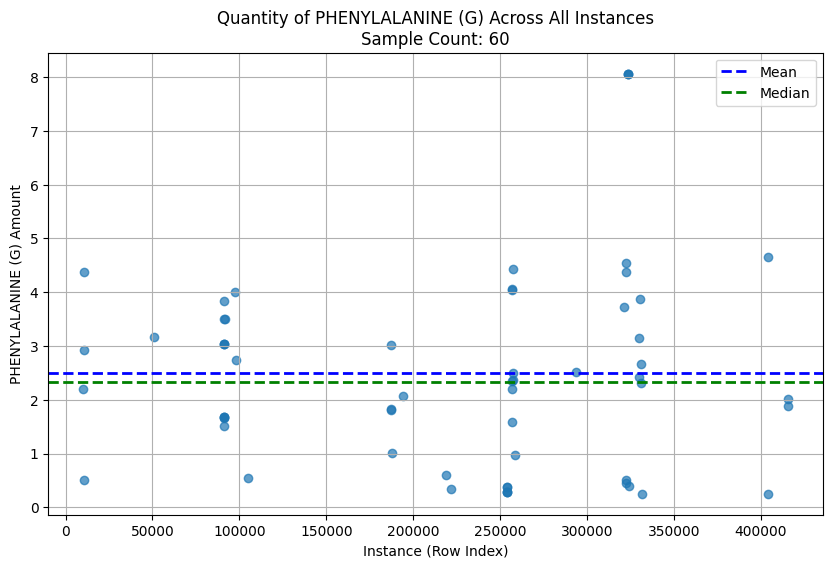

Nutrient: PHENYLALANINE (G)
Mean: 2.49
Median: 2.33
Mode: 1.68
Min: 0.25
Max: 8.06
Standard Deviation: 1.85
Sample Count: 60
------------------------------------------------------------------------------------------------------------------


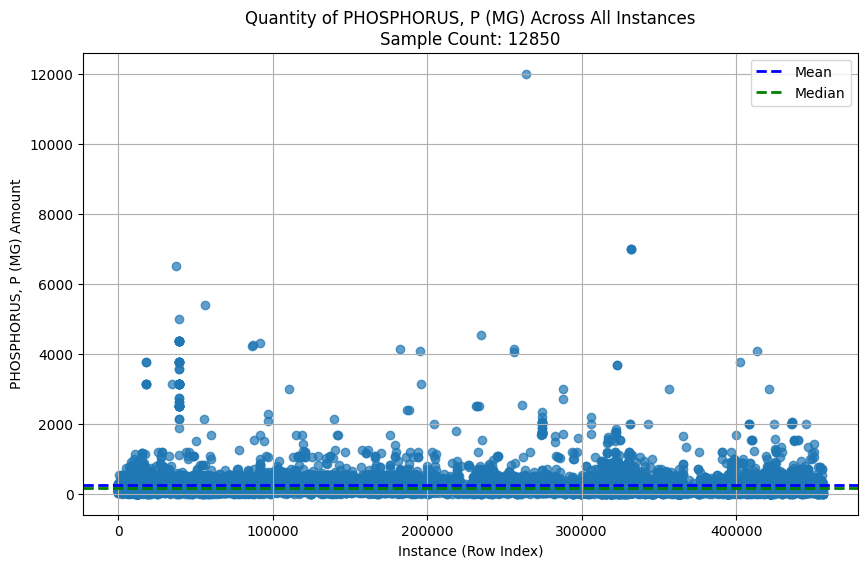

Nutrient: PHOSPHORUS, P (MG)
Mean: 251.97
Median: 176.00
Mode: 0.00
Min: 0.00
Max: 12000.00
Standard Deviation: 376.47
Sample Count: 12850
------------------------------------------------------------------------------------------------------------------


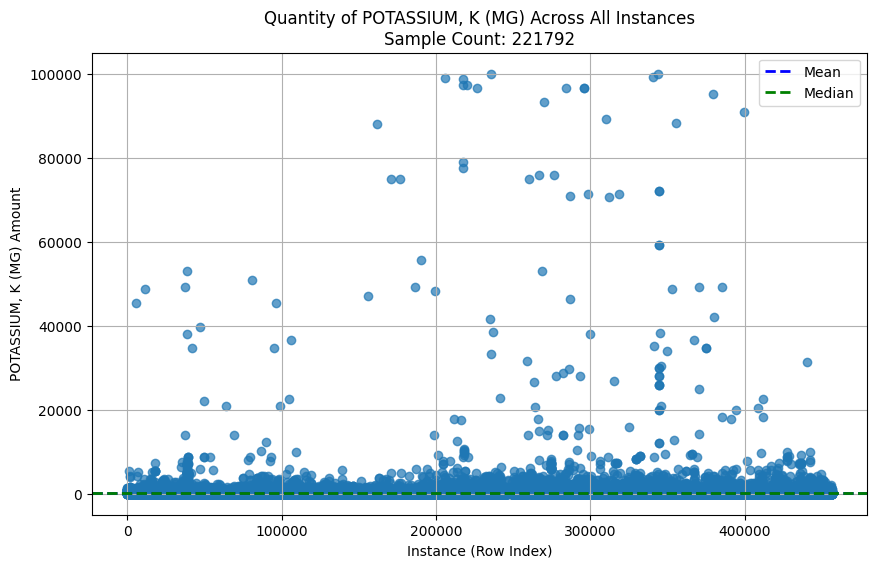

Nutrient: POTASSIUM, K (MG)
Mean: 271.57
Median: 165.00
Mode: 0.00
Min: 0.00
Max: 100000.00
Standard Deviation: 1246.51
Sample Count: 221792
------------------------------------------------------------------------------------------------------------------


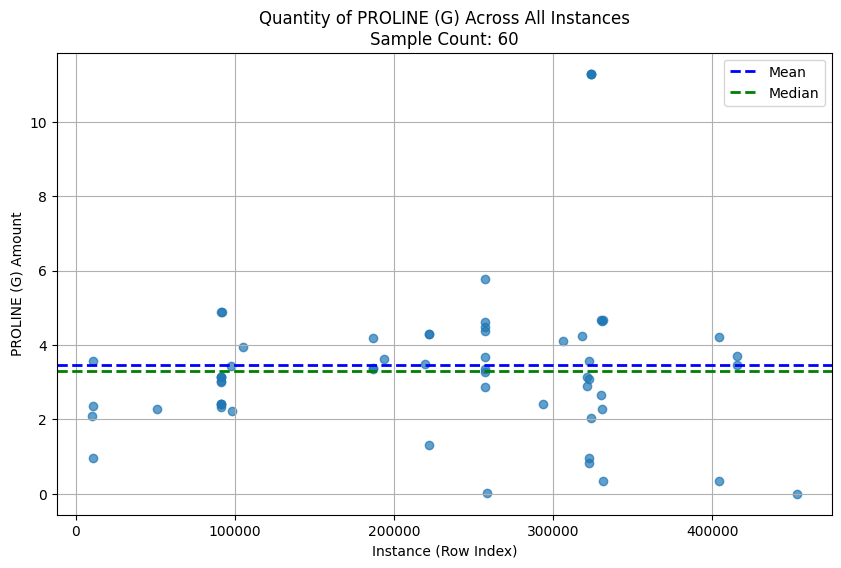

Nutrient: PROLINE (G)
Mean: 3.47
Median: 3.31
Mode: 2.42
Min: 0.00
Max: 11.29
Standard Deviation: 2.21
Sample Count: 60
------------------------------------------------------------------------------------------------------------------


c:\Users\Jack\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


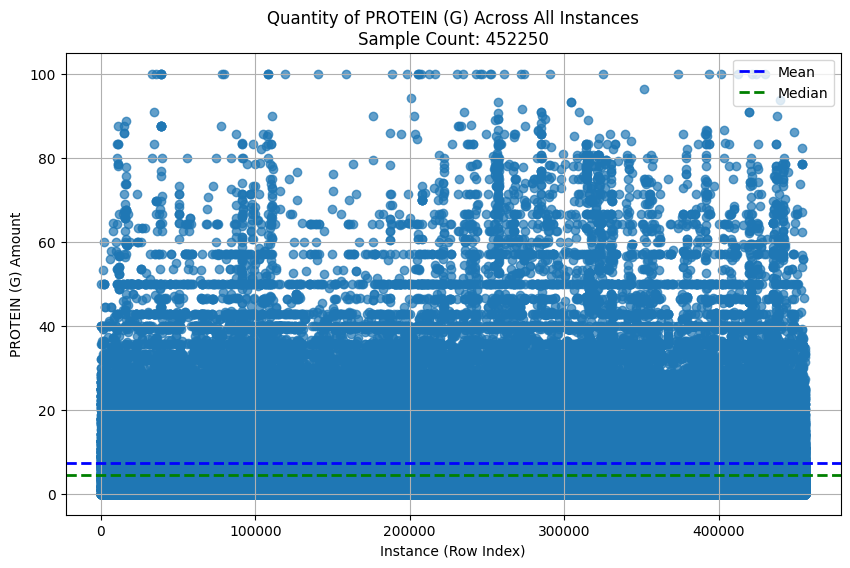

Nutrient: PROTEIN (G)
Mean: 7.30
Median: 4.56
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 8.95
Sample Count: 452250
------------------------------------------------------------------------------------------------------------------


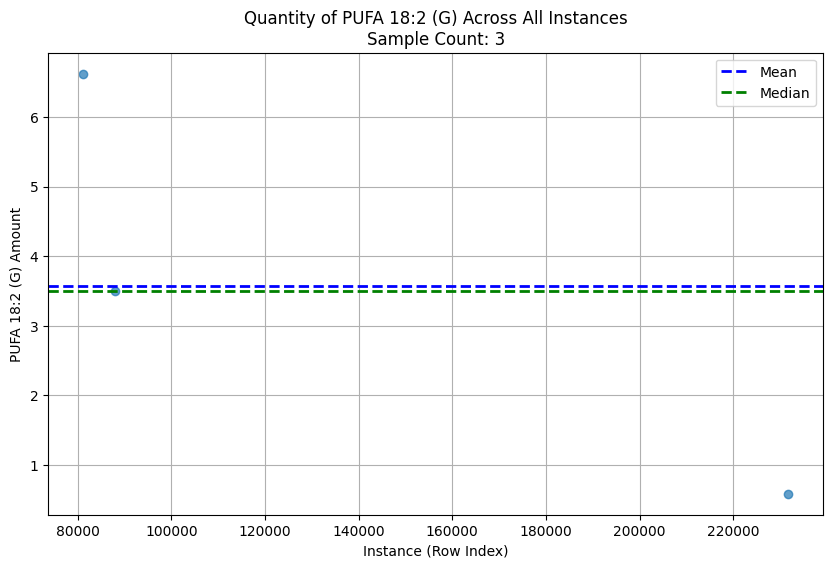

Nutrient: PUFA 18:2 (G)
Mean: 3.57
Median: 3.50
Mode: 0.58
Min: 0.58
Max: 6.62
Standard Deviation: 3.02
Sample Count: 3
------------------------------------------------------------------------------------------------------------------


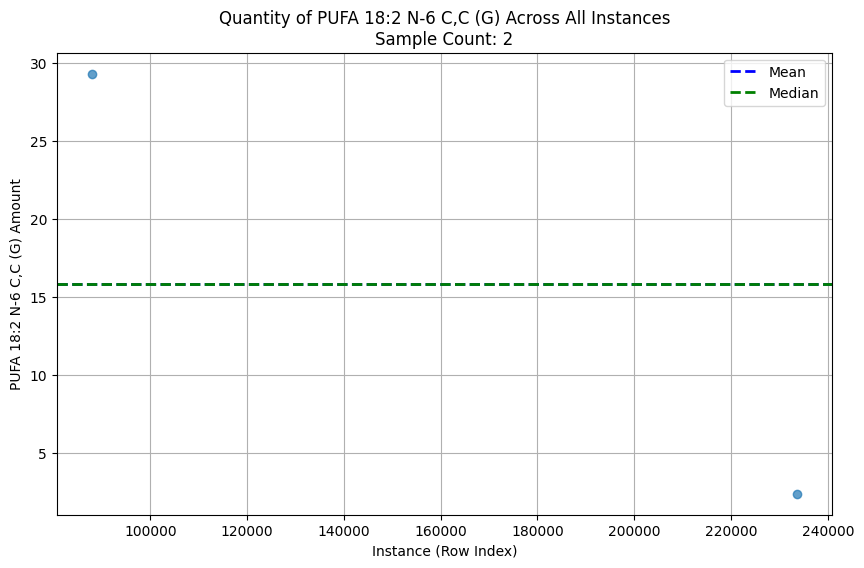

Nutrient: PUFA 18:2 N-6 C,C (G)
Mean: 15.86
Median: 15.86
Mode: 2.40
Min: 2.40
Max: 29.33
Standard Deviation: 19.04
Sample Count: 2
------------------------------------------------------------------------------------------------------------------


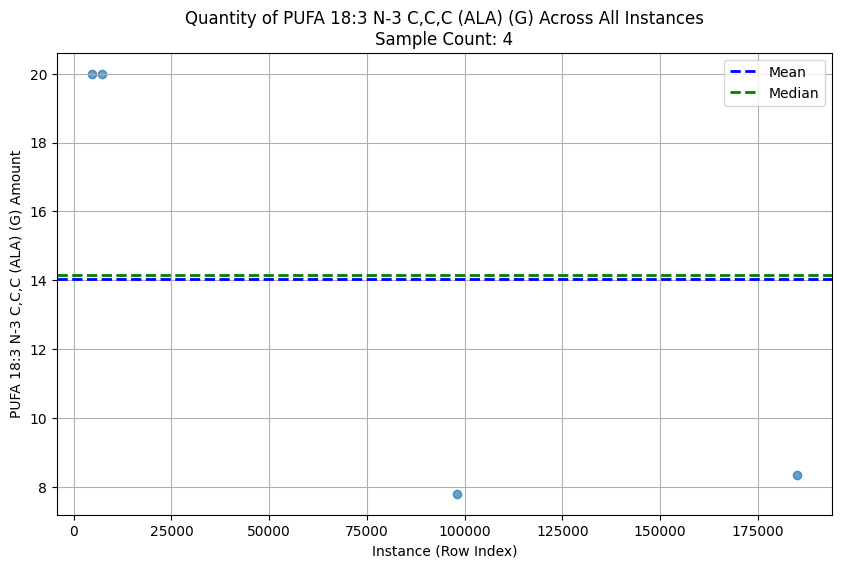

Nutrient: PUFA 18:3 N-3 C,C,C (ALA) (G)
Mean: 14.03
Median: 14.17
Mode: 20.00
Min: 7.80
Max: 20.00
Standard Deviation: 6.89
Sample Count: 4
------------------------------------------------------------------------------------------------------------------


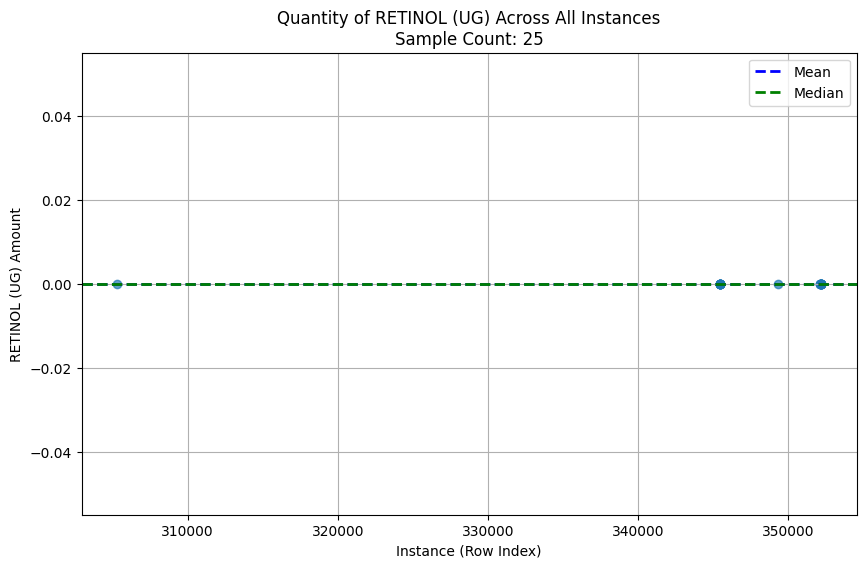

Nutrient: RETINOL (UG)
Mean: 0.00
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 0.00
Standard Deviation: 0.00
Sample Count: 25
------------------------------------------------------------------------------------------------------------------


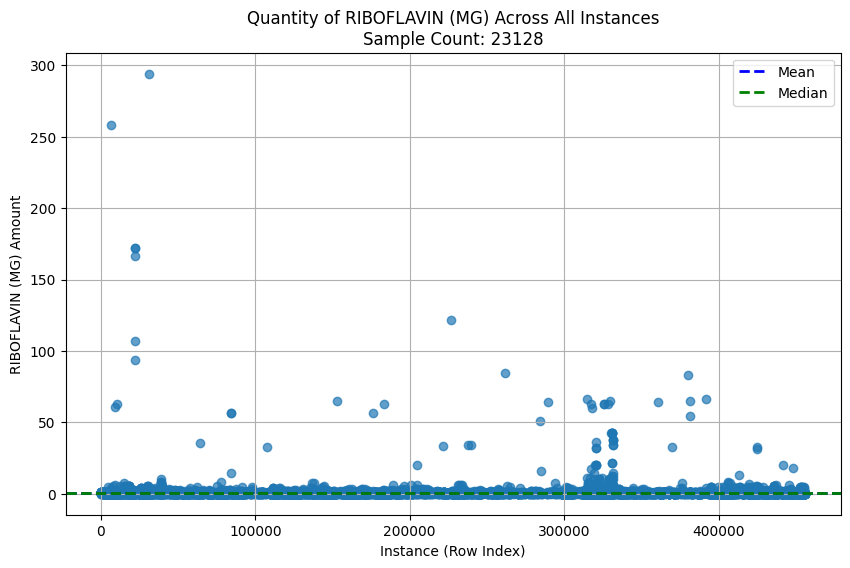

Nutrient: RIBOFLAVIN (MG)
Mean: 0.69
Median: 0.34
Mode: 0.46
Min: 0.00
Max: 294.12
Standard Deviation: 4.19
Sample Count: 23128
------------------------------------------------------------------------------------------------------------------


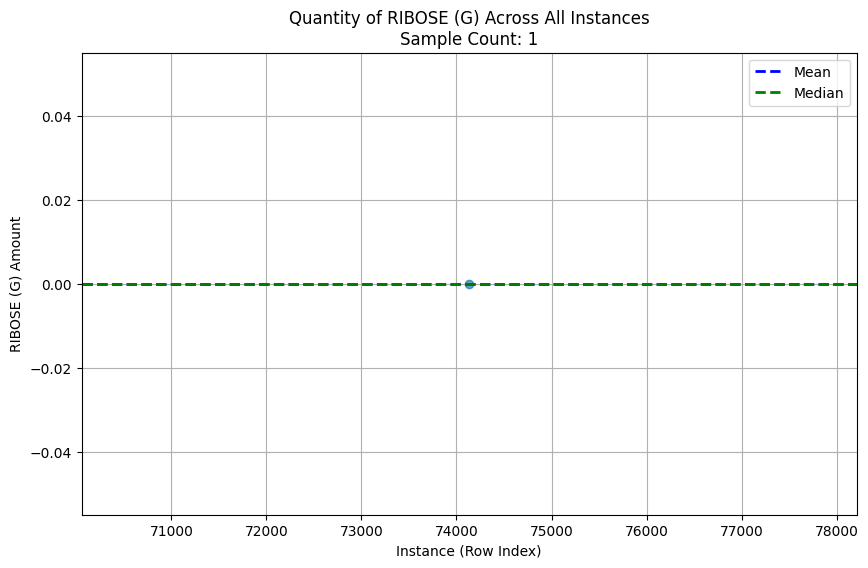

Nutrient: RIBOSE (G)
Mean: 0.00
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 0.00
Standard Deviation: nan
Sample Count: 1
------------------------------------------------------------------------------------------------------------------


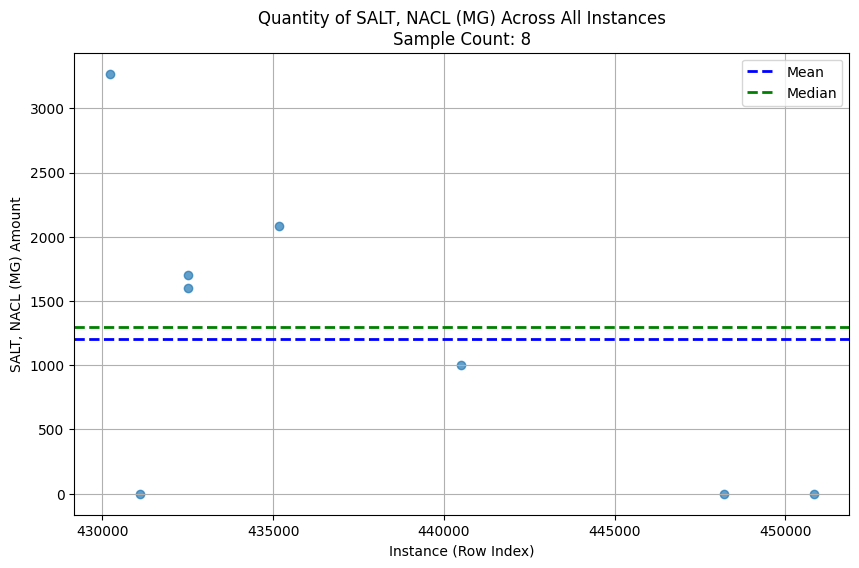

Nutrient: SALT, NACL (MG)
Mean: 1206.12
Median: 1300.00
Mode: 0.00
Min: 0.00
Max: 3269.00
Standard Deviation: 1184.72
Sample Count: 8
------------------------------------------------------------------------------------------------------------------


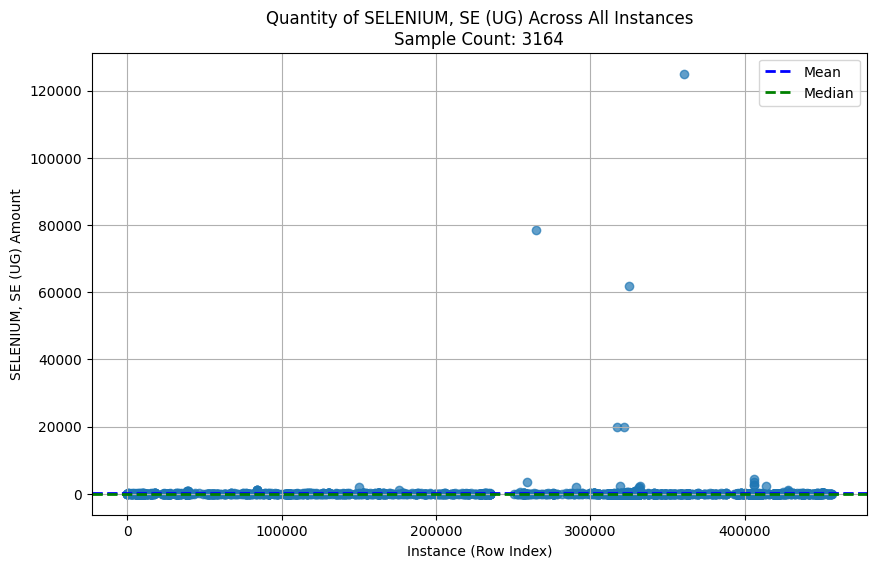

Nutrient: SELENIUM, SE (UG)
Mean: 140.03
Median: 10.00
Mode: 0.00
Min: 0.00
Max: 125000.00
Standard Deviation: 2892.58
Sample Count: 3164
------------------------------------------------------------------------------------------------------------------


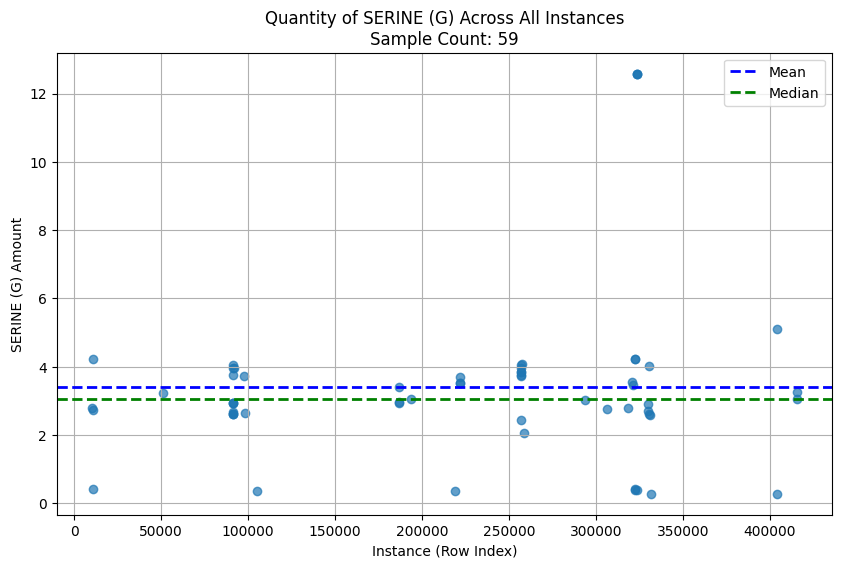

Nutrient: SERINE (G)
Mean: 3.39
Median: 3.04
Mode: 2.60
Min: 0.28
Max: 12.58
Standard Deviation: 2.44
Sample Count: 59
------------------------------------------------------------------------------------------------------------------


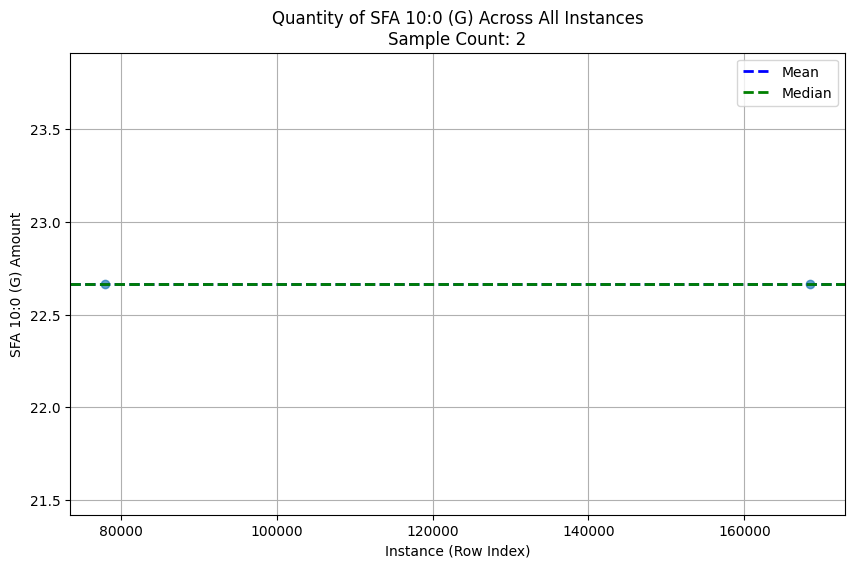

Nutrient: SFA 10:0 (G)
Mean: 22.67
Median: 22.67
Mode: 22.67
Min: 22.67
Max: 22.67
Standard Deviation: 0.00
Sample Count: 2
------------------------------------------------------------------------------------------------------------------


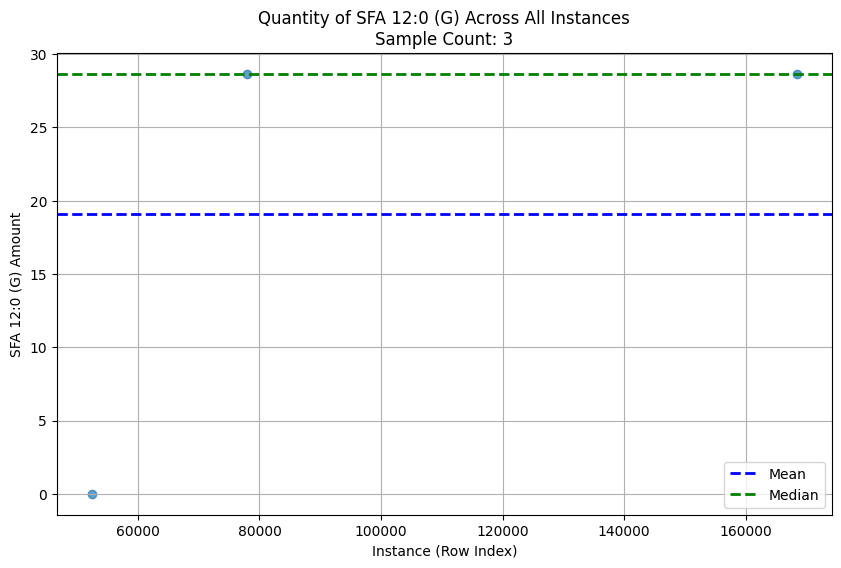

Nutrient: SFA 12:0 (G)
Mean: 19.11
Median: 28.67
Mode: 28.67
Min: 0.01
Max: 28.67
Standard Deviation: 16.55
Sample Count: 3
------------------------------------------------------------------------------------------------------------------


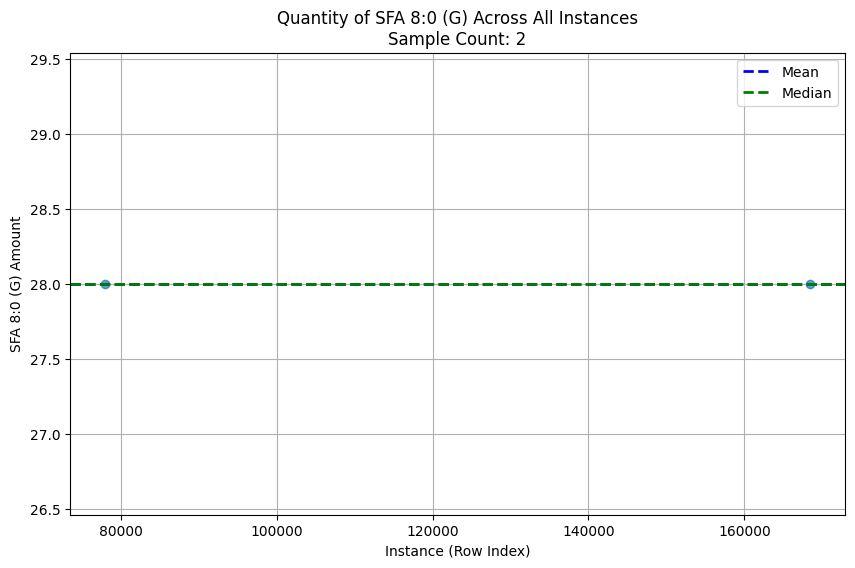

Nutrient: SFA 8:0 (G)
Mean: 28.00
Median: 28.00
Mode: 28.00
Min: 28.00
Max: 28.00
Standard Deviation: 0.00
Sample Count: 2
------------------------------------------------------------------------------------------------------------------


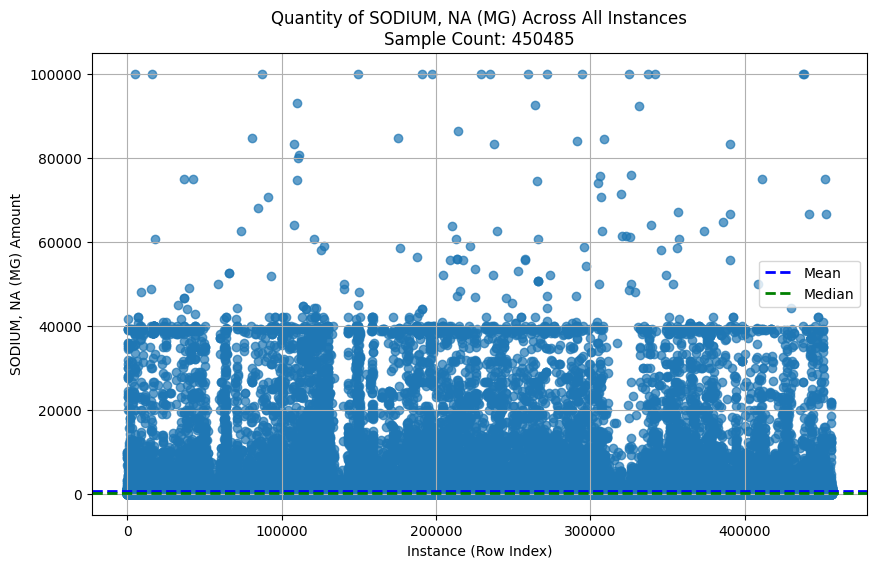

Nutrient: SODIUM, NA (MG)
Mean: 701.39
Median: 256.00
Mode: 0.00
Min: 0.00
Max: 100000.00
Standard Deviation: 2933.01
Sample Count: 450485
------------------------------------------------------------------------------------------------------------------


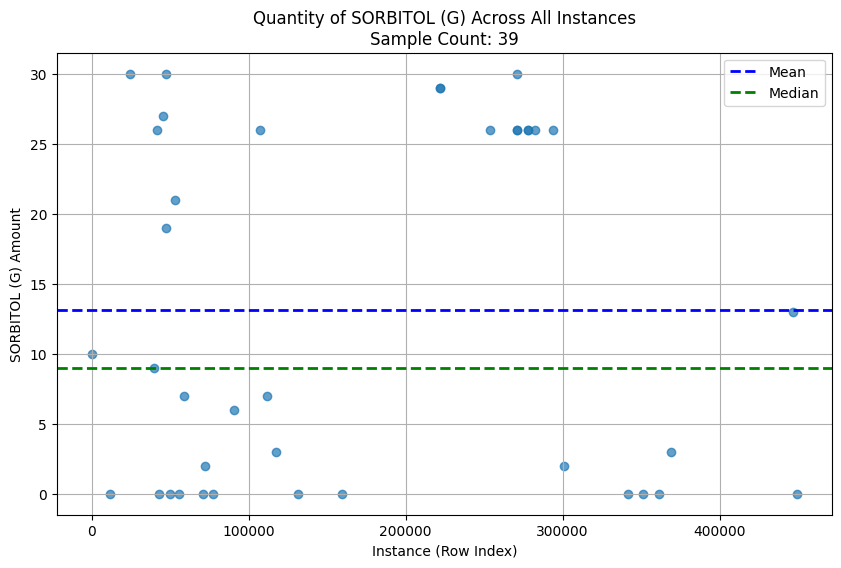

Nutrient: SORBITOL (G)
Mean: 13.10
Median: 9.00
Mode: 0.00
Min: 0.00
Max: 30.00
Standard Deviation: 12.37
Sample Count: 39
------------------------------------------------------------------------------------------------------------------


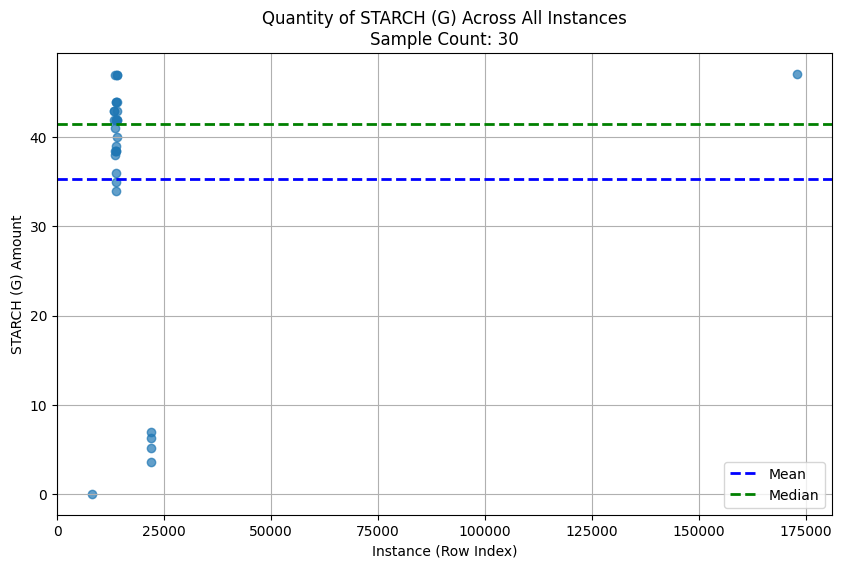

Nutrient: STARCH (G)
Mean: 35.32
Median: 41.50
Mode: 42.00
Min: 0.00
Max: 47.14
Standard Deviation: 14.50
Sample Count: 30
------------------------------------------------------------------------------------------------------------------


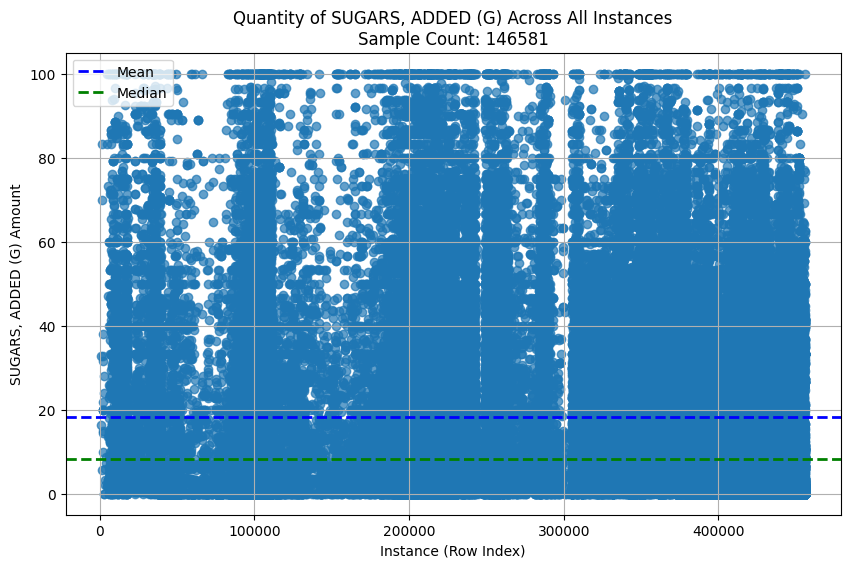

Nutrient: SUGARS, ADDED (G)
Mean: 18.18
Median: 8.30
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 22.13
Sample Count: 146581
------------------------------------------------------------------------------------------------------------------


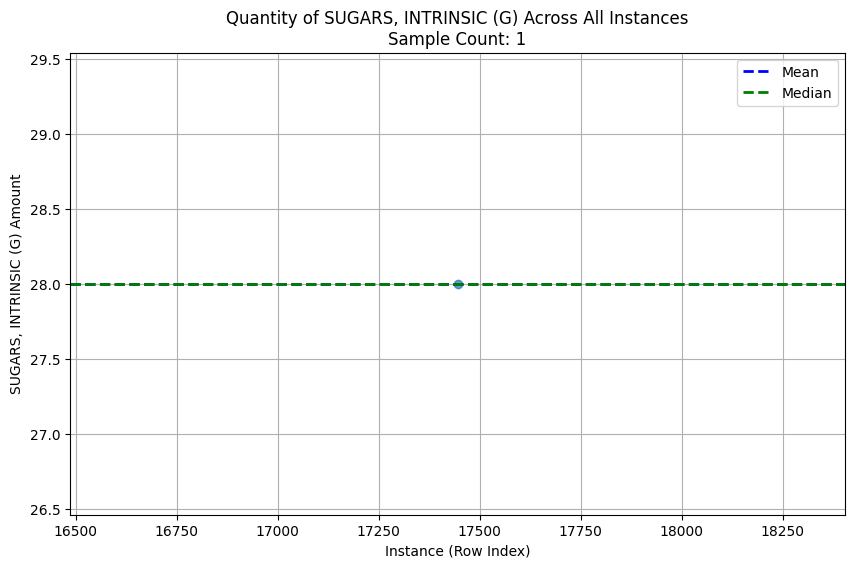

Nutrient: SUGARS, INTRINSIC (G)
Mean: 28.00
Median: 28.00
Mode: 28.00
Min: 28.00
Max: 28.00
Standard Deviation: nan
Sample Count: 1
------------------------------------------------------------------------------------------------------------------


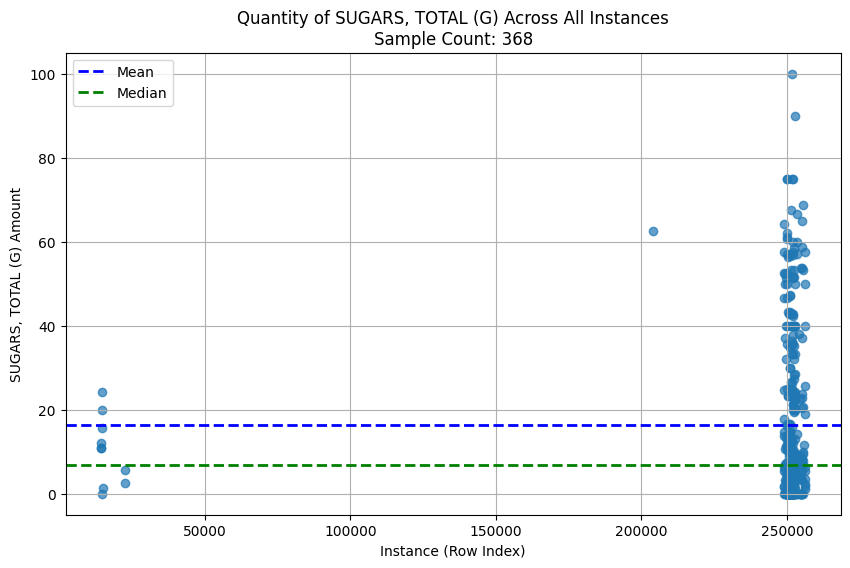

Nutrient: SUGARS, TOTAL (G)
Mean: 16.46
Median: 6.79
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 20.44
Sample Count: 368
------------------------------------------------------------------------------------------------------------------


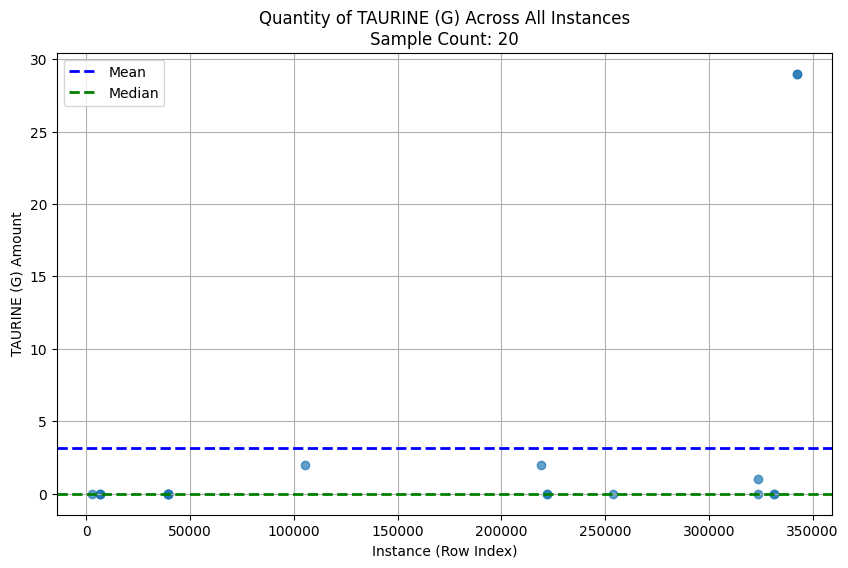

Nutrient: TAURINE (G)
Mean: 3.15
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 29.00
Standard Deviation: 8.86
Sample Count: 20
------------------------------------------------------------------------------------------------------------------


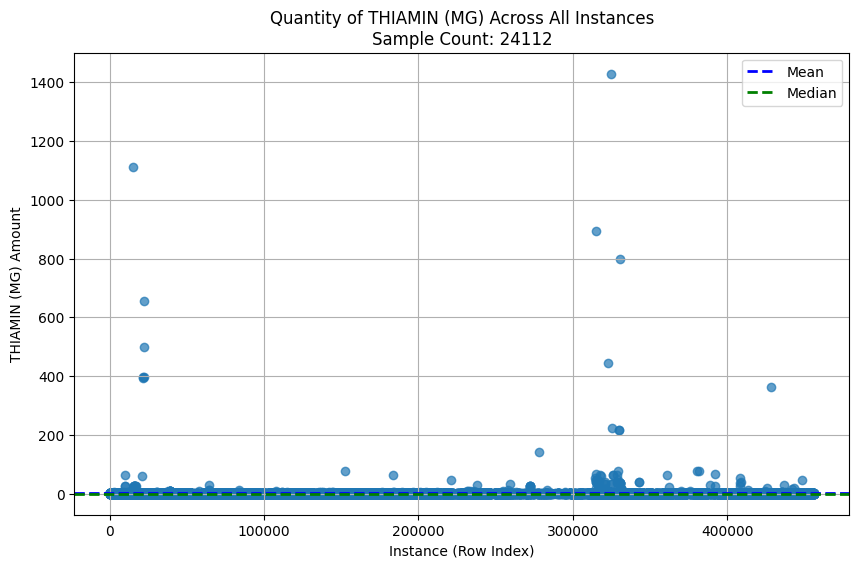

Nutrient: THIAMIN (MG)
Mean: 1.06
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 1429.00
Standard Deviation: 16.42
Sample Count: 24112
------------------------------------------------------------------------------------------------------------------


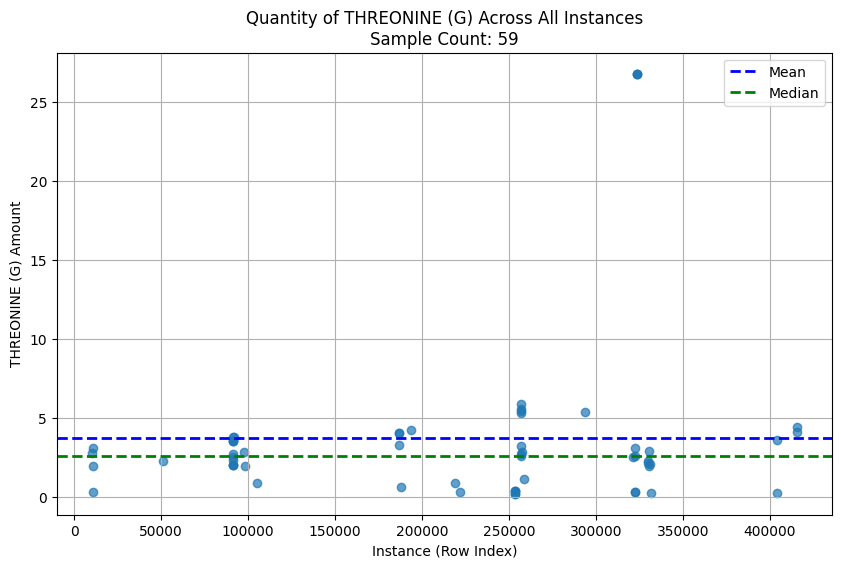

Nutrient: THREONINE (G)
Mean: 3.74
Median: 2.60
Mode: 2.06
Min: 0.21
Max: 26.77
Standard Deviation: 5.59
Sample Count: 59
------------------------------------------------------------------------------------------------------------------


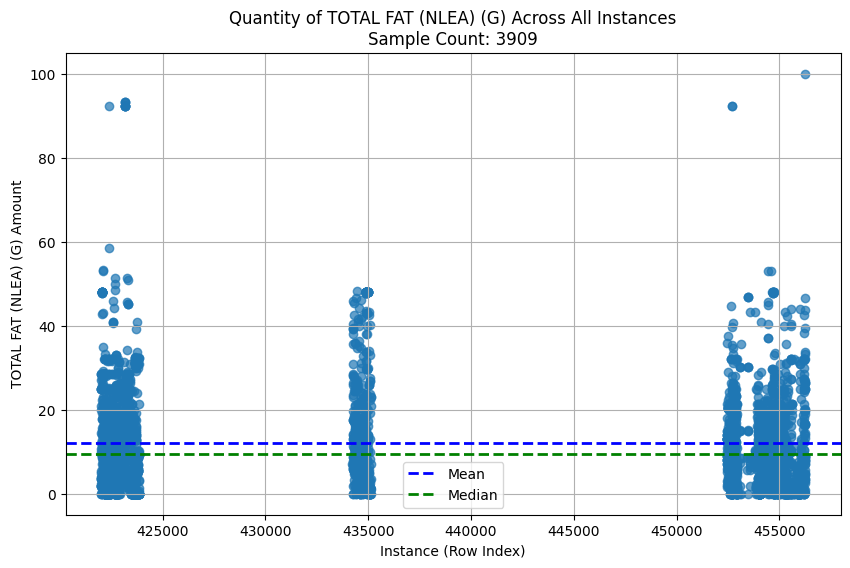

Nutrient: TOTAL FAT (NLEA) (G)
Mean: 12.19
Median: 9.40
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 11.99
Sample Count: 3909
------------------------------------------------------------------------------------------------------------------


c:\Users\Jack\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


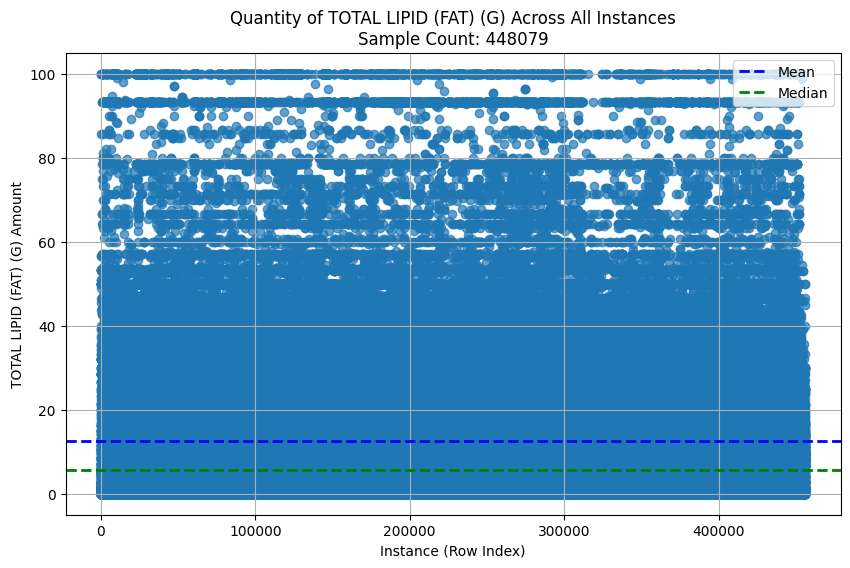

Nutrient: TOTAL LIPID (FAT) (G)
Mean: 12.53
Median: 5.62
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 16.69
Sample Count: 448079
------------------------------------------------------------------------------------------------------------------


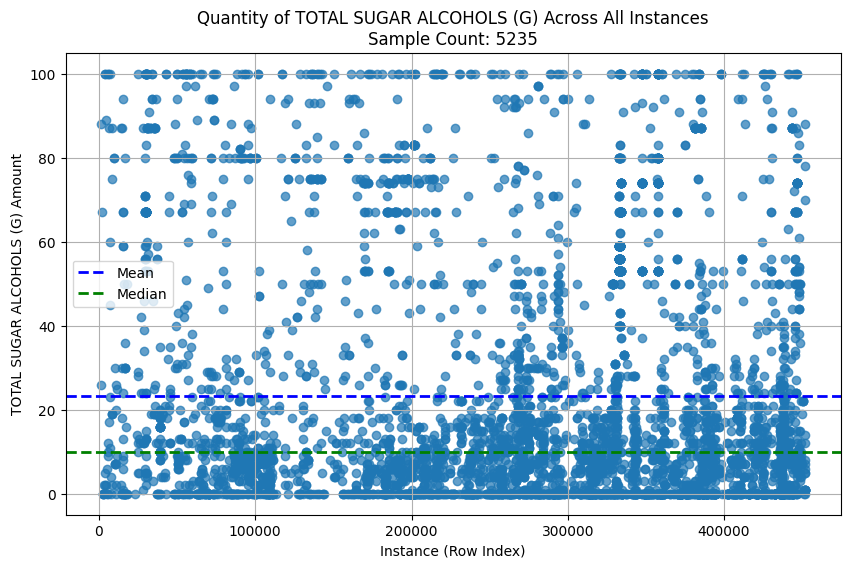

Nutrient: TOTAL SUGAR ALCOHOLS (G)
Mean: 23.21
Median: 10.00
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 28.77
Sample Count: 5235
------------------------------------------------------------------------------------------------------------------


c:\Users\Jack\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


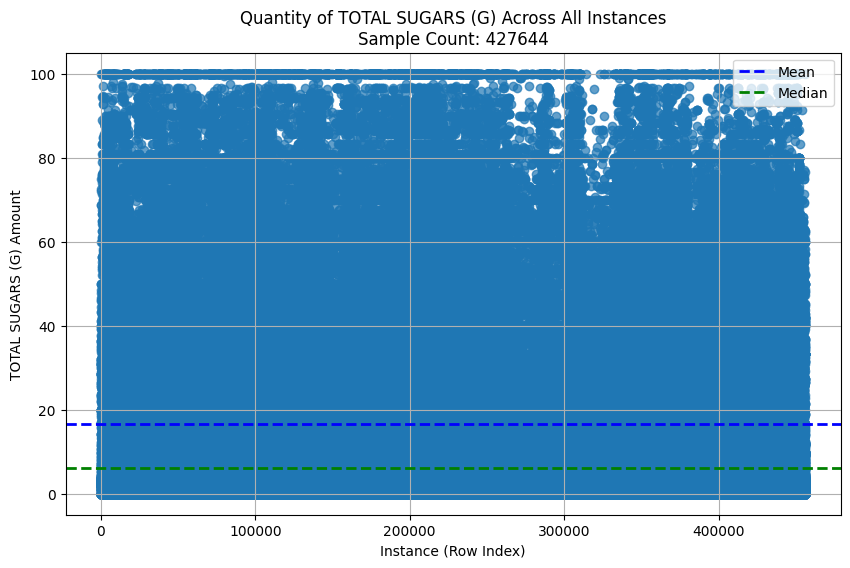

Nutrient: TOTAL SUGARS (G)
Mean: 16.59
Median: 6.18
Mode: 0.00
Min: 0.00
Max: 100.00
Standard Deviation: 21.63
Sample Count: 427644
------------------------------------------------------------------------------------------------------------------


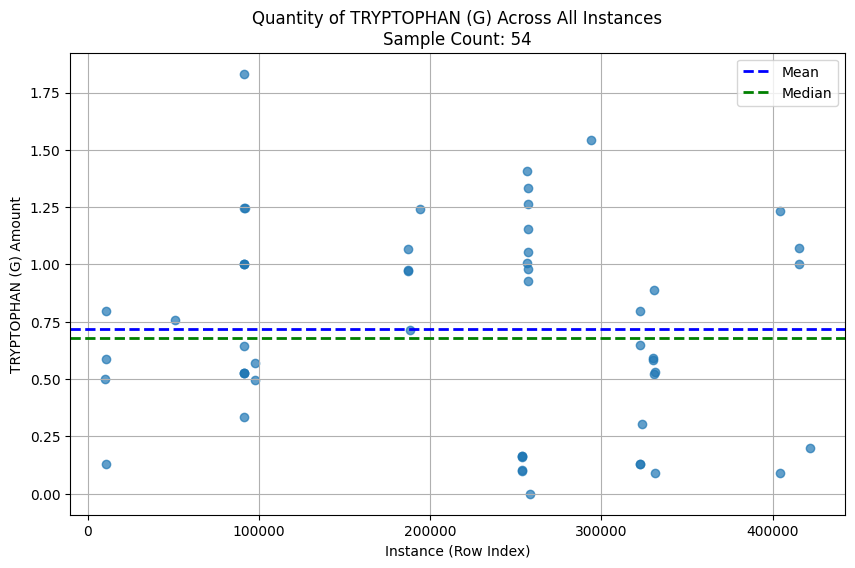

Nutrient: TRYPTOPHAN (G)
Mean: 0.72
Median: 0.68
Mode: 1.00
Min: 0.00
Max: 1.83
Standard Deviation: 0.44
Sample Count: 54
------------------------------------------------------------------------------------------------------------------


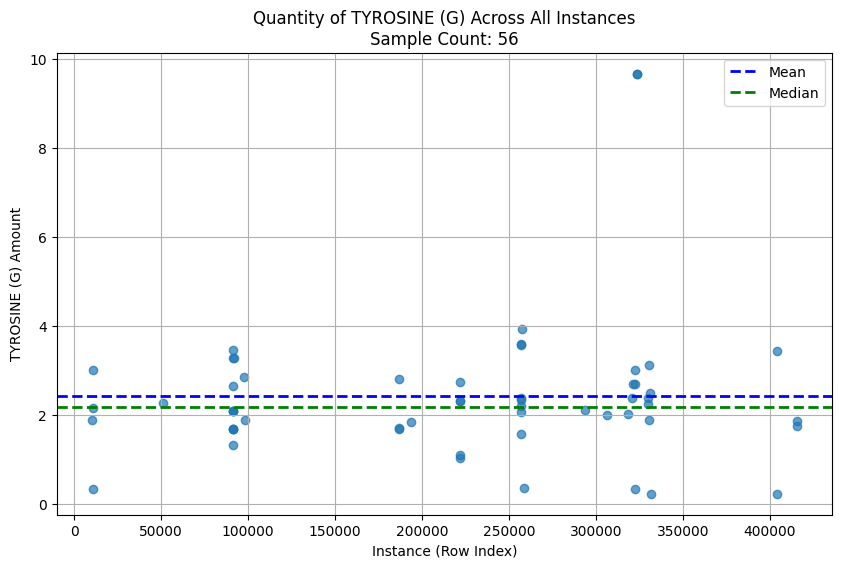

Nutrient: TYROSINE (G)
Mean: 2.42
Median: 2.18
Mode: 1.68
Min: 0.23
Max: 9.68
Standard Deviation: 1.65
Sample Count: 56
------------------------------------------------------------------------------------------------------------------


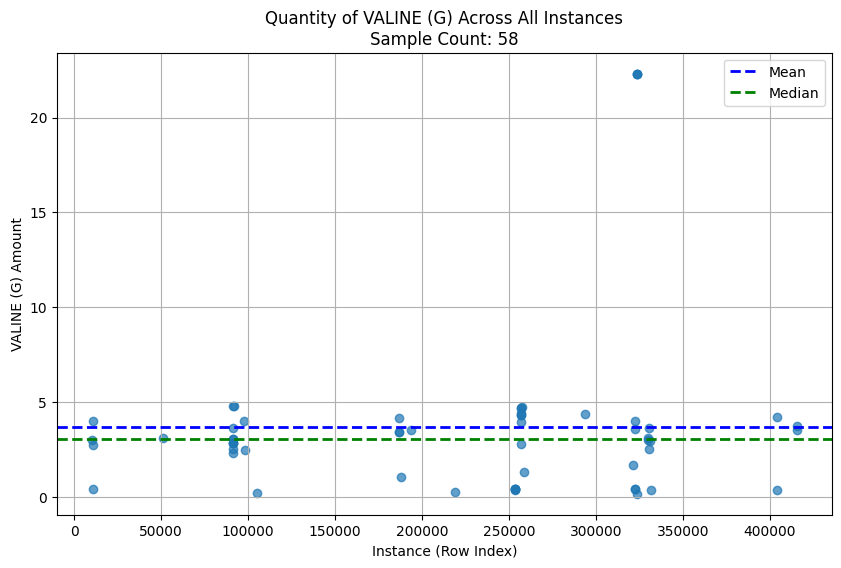

Nutrient: VALINE (G)
Mean: 3.70
Median: 3.08
Mode: 2.83
Min: 0.17
Max: 22.31
Standard Deviation: 4.63
Sample Count: 58
------------------------------------------------------------------------------------------------------------------


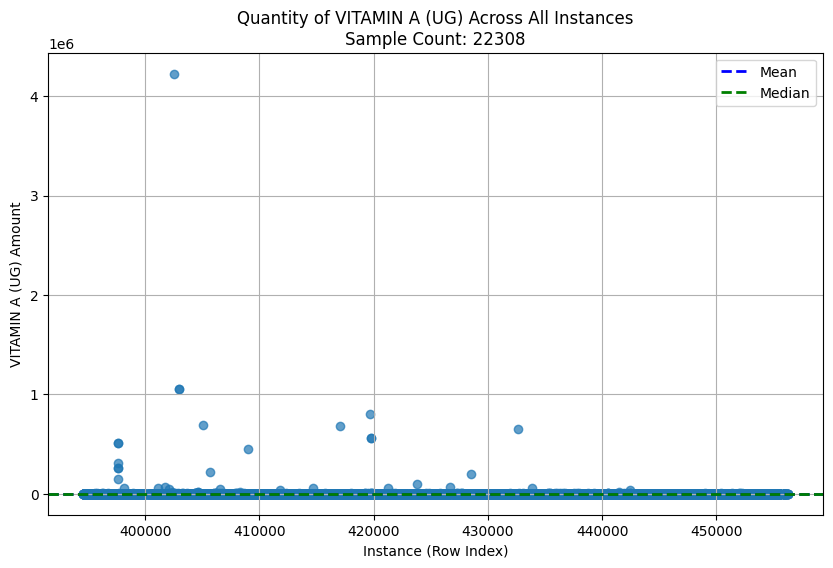

Nutrient: VITAMIN A (UG)
Mean: 727.54
Median: 7.00
Mode: 0.00
Min: 0.00
Max: 4225352.00
Standard Deviation: 32643.70
Sample Count: 22308
------------------------------------------------------------------------------------------------------------------


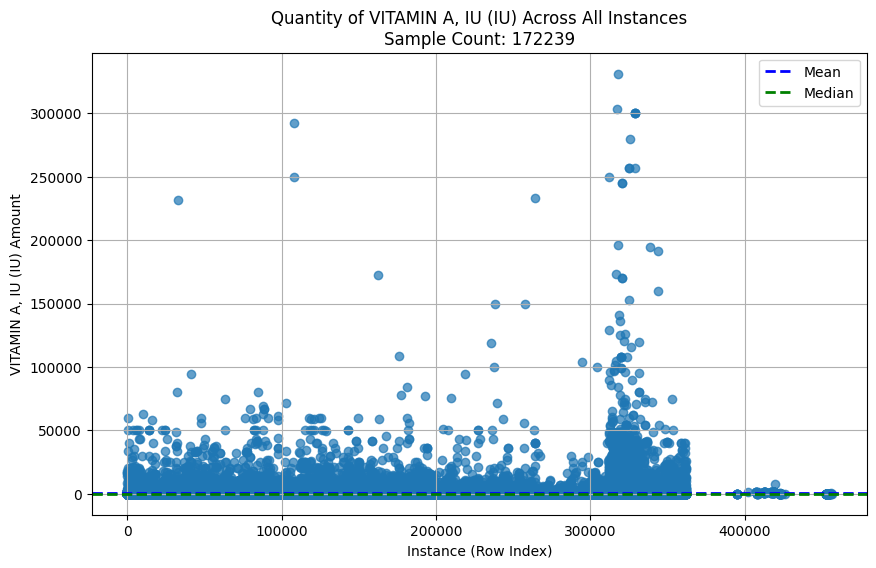

Nutrient: VITAMIN A, IU (IU)
Mean: 759.76
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 331282.00
Standard Deviation: 4523.27
Sample Count: 172239
------------------------------------------------------------------------------------------------------------------


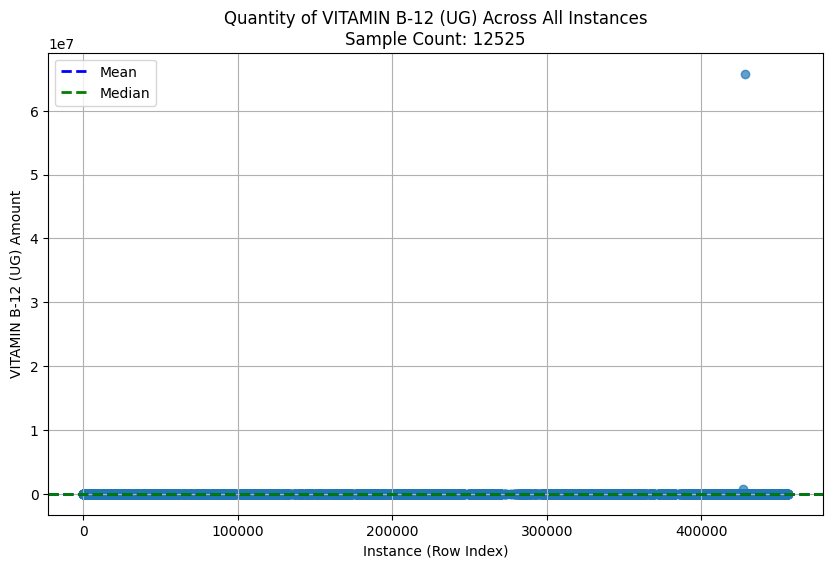

Nutrient: VITAMIN B-12 (UG)
Mean: 5331.61
Median: 1.69
Mode: 0.00
Min: 0.00
Max: 65789473.68
Standard Deviation: 587885.02
Sample Count: 12525
------------------------------------------------------------------------------------------------------------------


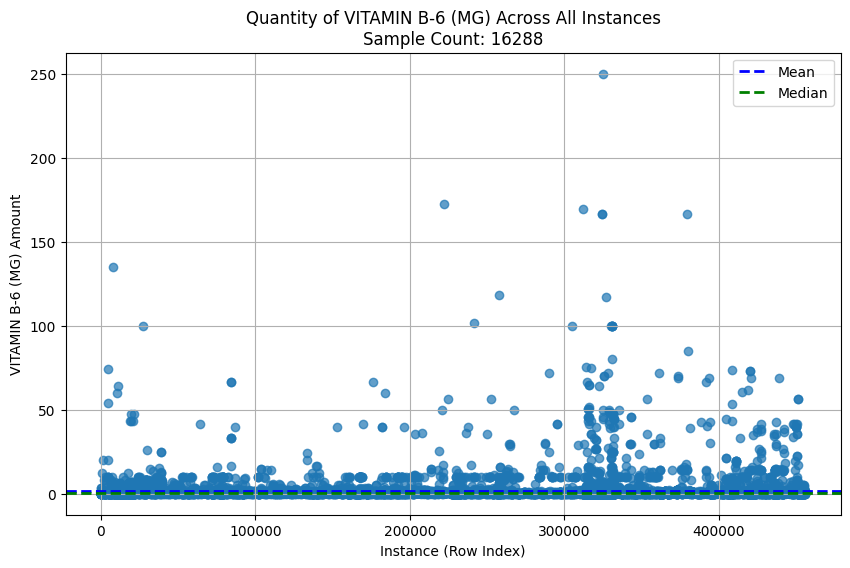

Nutrient: VITAMIN B-6 (MG)
Mean: 1.73
Median: 0.56
Mode: 0.00
Min: 0.00
Max: 250.00
Standard Deviation: 6.84
Sample Count: 16288
------------------------------------------------------------------------------------------------------------------


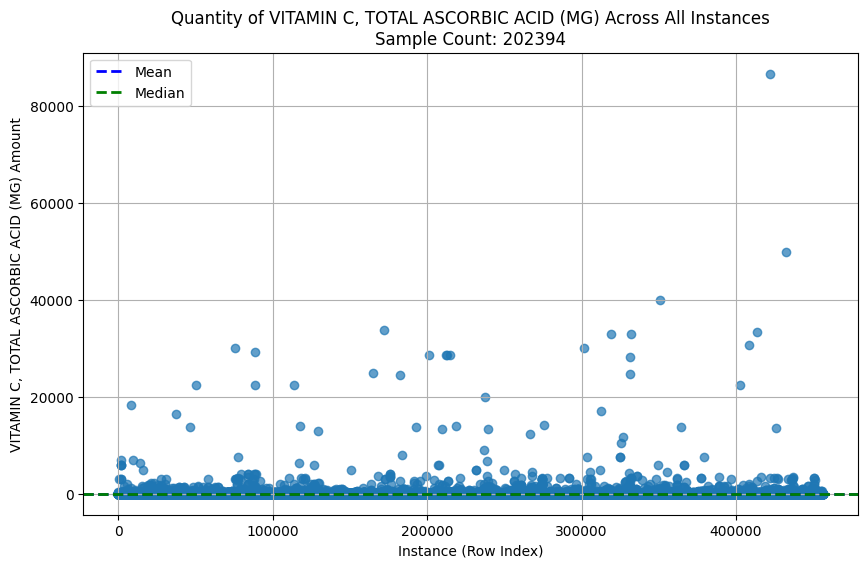

Nutrient: VITAMIN C, TOTAL ASCORBIC ACID (MG)
Mean: 19.07
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 86718.80
Standard Deviation: 411.32
Sample Count: 202394
------------------------------------------------------------------------------------------------------------------


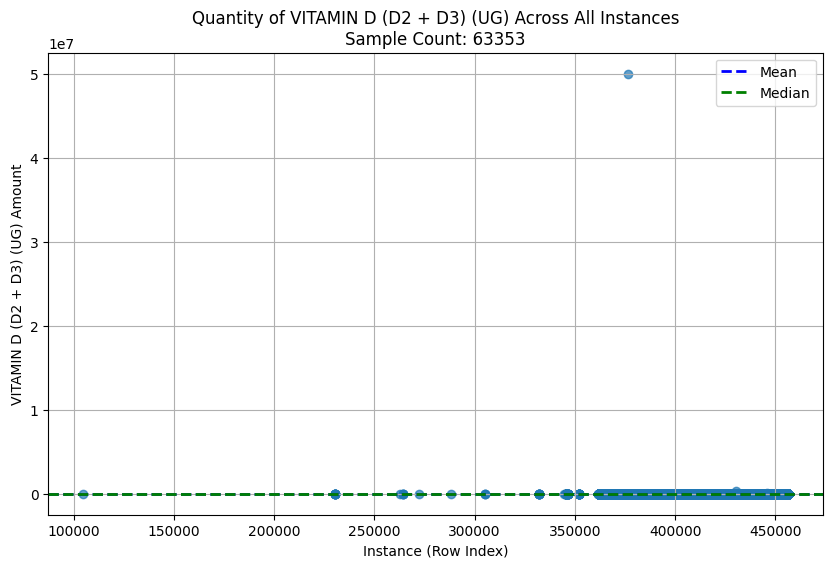

Nutrient: VITAMIN D (D2 + D3) (UG)
Mean: 795.92
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 50000000.00
Standard Deviation: 198652.28
Sample Count: 63353
------------------------------------------------------------------------------------------------------------------


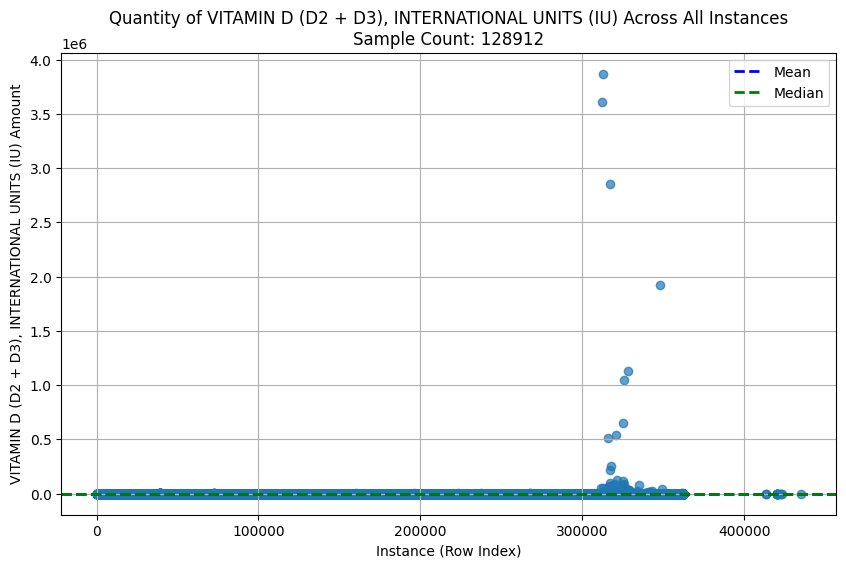

Nutrient: VITAMIN D (D2 + D3), INTERNATIONAL UNITS (IU)
Mean: 161.16
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 3870968.00
Standard Deviation: 18361.16
Sample Count: 128912
------------------------------------------------------------------------------------------------------------------


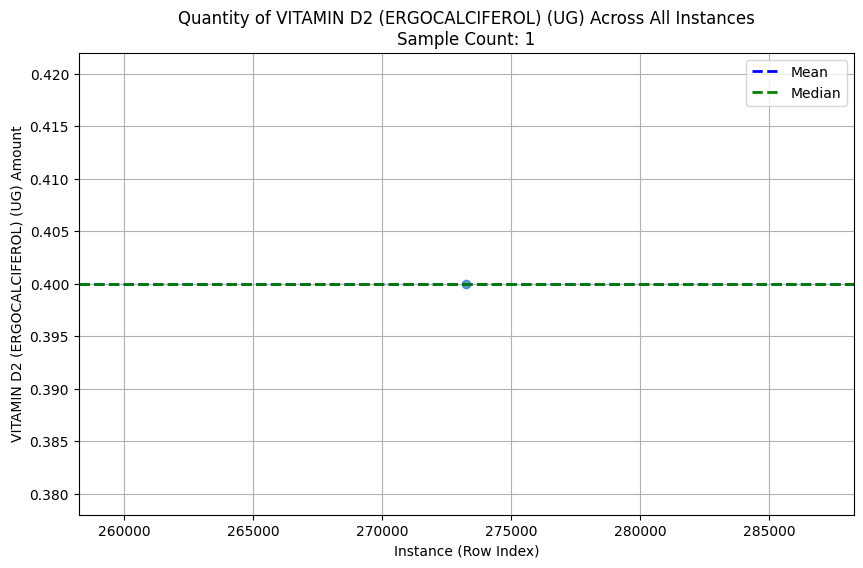

Nutrient: VITAMIN D2 (ERGOCALCIFEROL) (UG)
Mean: 0.40
Median: 0.40
Mode: 0.40
Min: 0.40
Max: 0.40
Standard Deviation: nan
Sample Count: 1
------------------------------------------------------------------------------------------------------------------


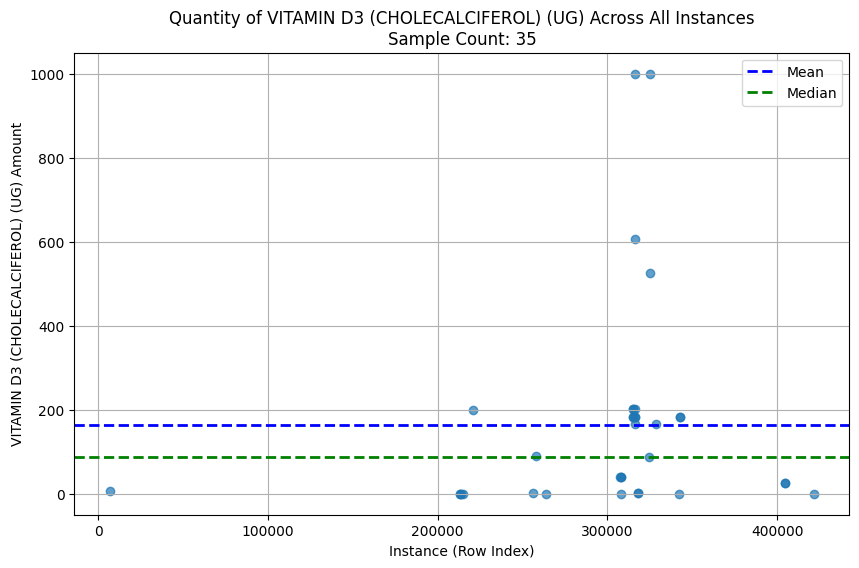

Nutrient: VITAMIN D3 (CHOLECALCIFEROL) (UG)
Mean: 163.57
Median: 87.00
Mode: 0.00
Min: 0.00
Max: 1000.00
Standard Deviation: 251.25
Sample Count: 35
------------------------------------------------------------------------------------------------------------------


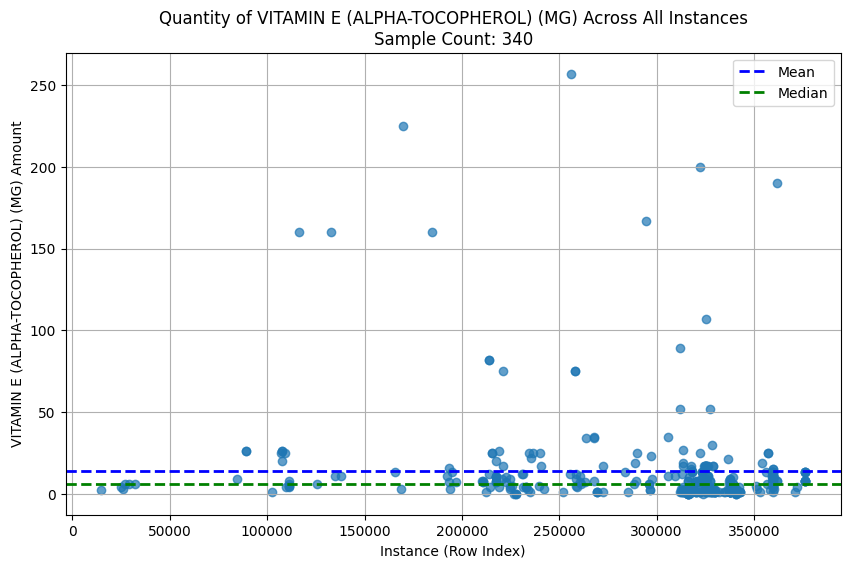

Nutrient: VITAMIN E (ALPHA-TOCOPHEROL) (MG)
Mean: 13.80
Median: 6.00
Mode: 1.00
Min: 0.00
Max: 257.00
Standard Deviation: 30.96
Sample Count: 340
------------------------------------------------------------------------------------------------------------------


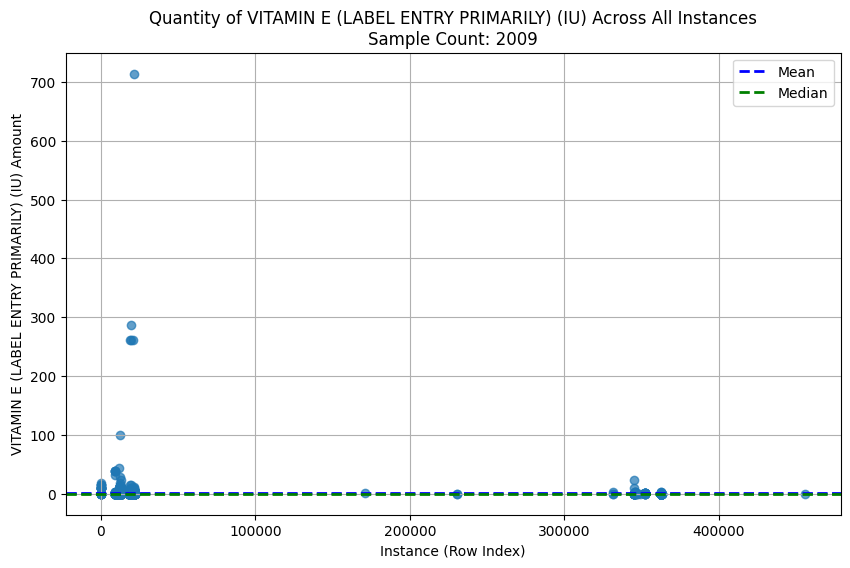

Nutrient: VITAMIN E (LABEL ENTRY PRIMARILY) (IU)
Mean: 1.79
Median: 0.00
Mode: 0.00
Min: 0.00
Max: 714.00
Standard Deviation: 20.21
Sample Count: 2009
------------------------------------------------------------------------------------------------------------------


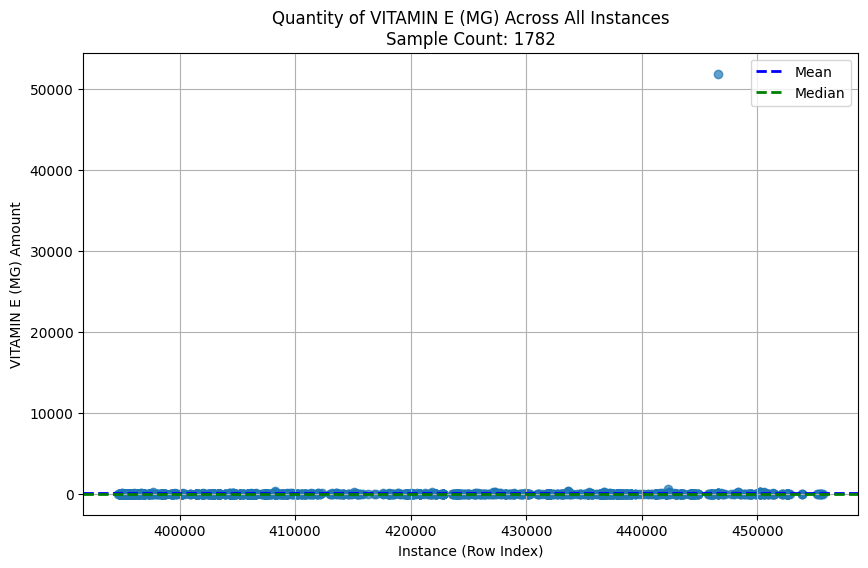

Nutrient: VITAMIN E (MG)
Mean: 39.86
Median: 3.00
Mode: 1.00
Min: 0.00
Max: 51923.00
Standard Deviation: 1230.14
Sample Count: 1782
------------------------------------------------------------------------------------------------------------------


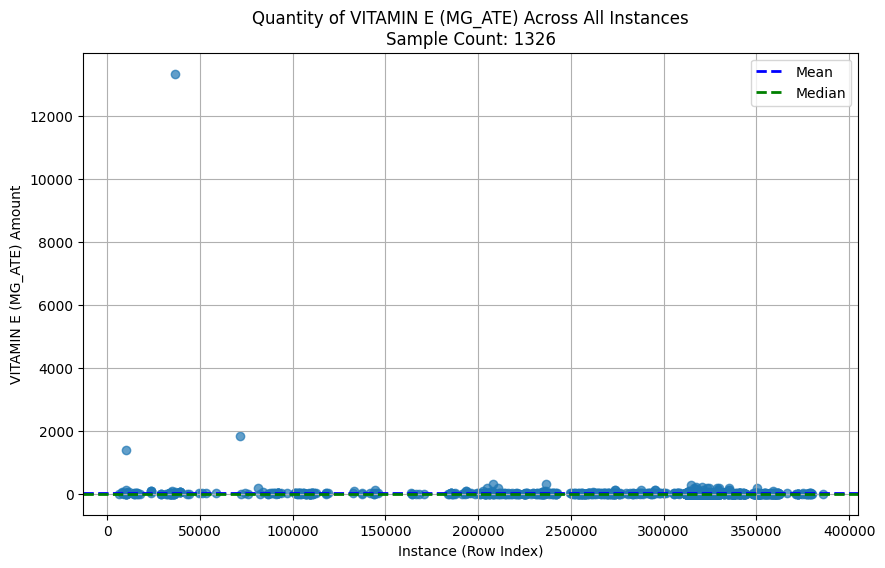

Nutrient: VITAMIN E (MG_ATE)
Mean: 25.51
Median: 4.00
Mode: 2.00
Min: 0.00
Max: 13333.00
Standard Deviation: 372.05
Sample Count: 1326
------------------------------------------------------------------------------------------------------------------


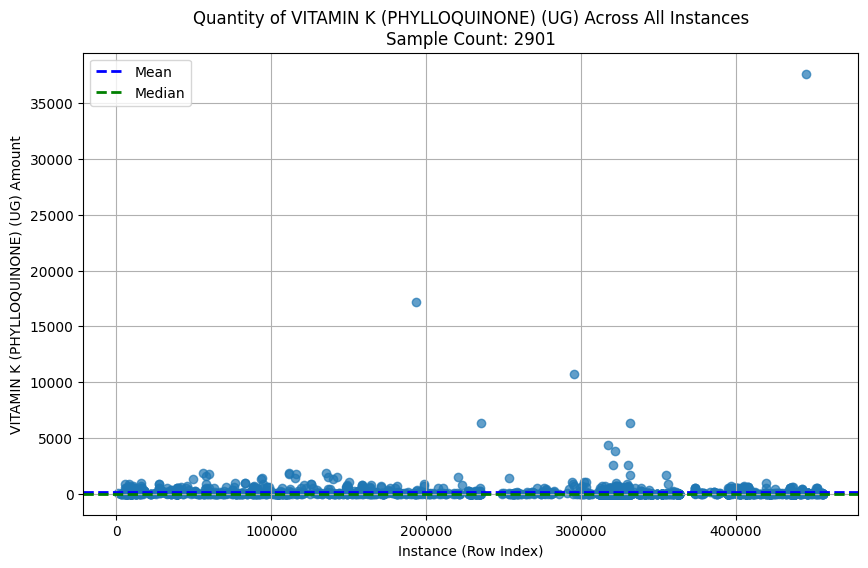

Nutrient: VITAMIN K (PHYLLOQUINONE) (UG)
Mean: 118.77
Median: 13.00
Mode: 0.00
Min: 0.00
Max: 37647.10
Standard Deviation: 839.40
Sample Count: 2901
------------------------------------------------------------------------------------------------------------------


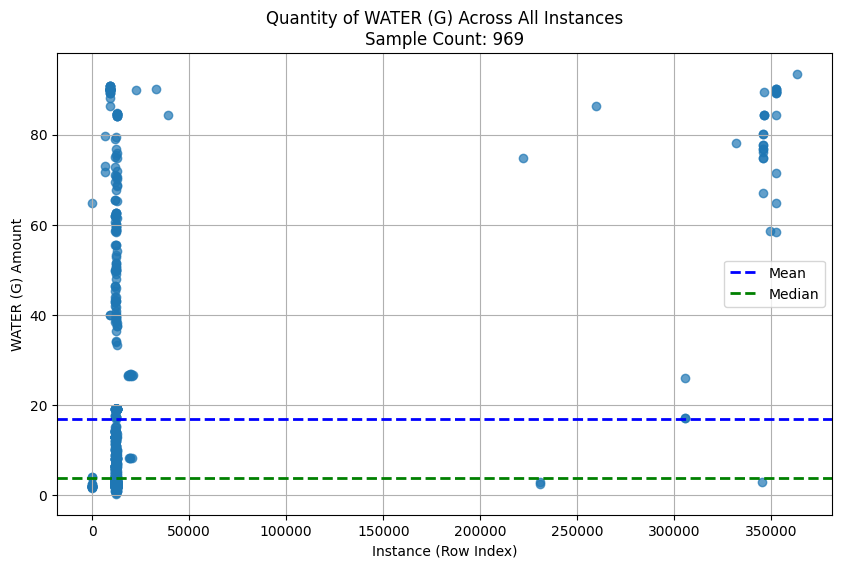

Nutrient: WATER (G)
Mean: 16.79
Median: 3.70
Mode: 2.50
Min: 0.30
Max: 93.50
Standard Deviation: 25.38
Sample Count: 969
------------------------------------------------------------------------------------------------------------------


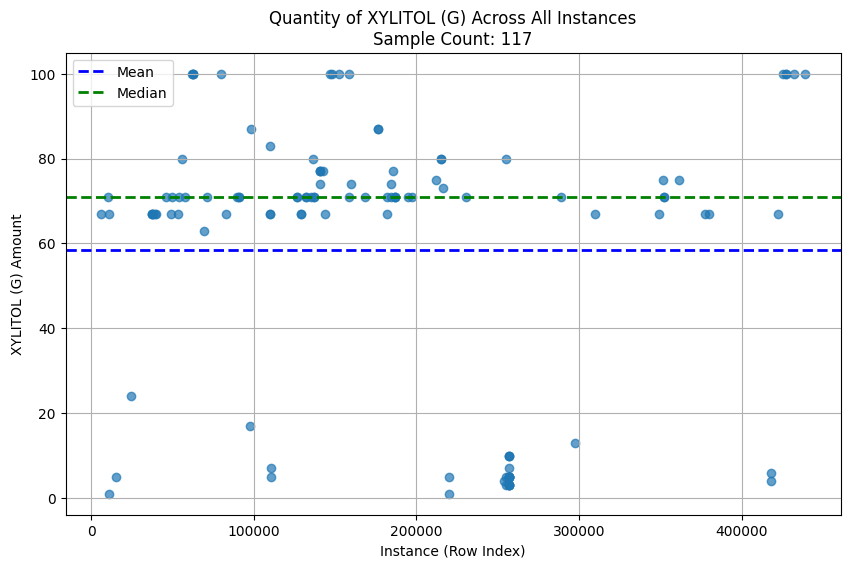

Nutrient: XYLITOL (G)
Mean: 58.39
Median: 71.00
Mode: 71.00
Min: 1.00
Max: 100.00
Standard Deviation: 32.39
Sample Count: 117
------------------------------------------------------------------------------------------------------------------


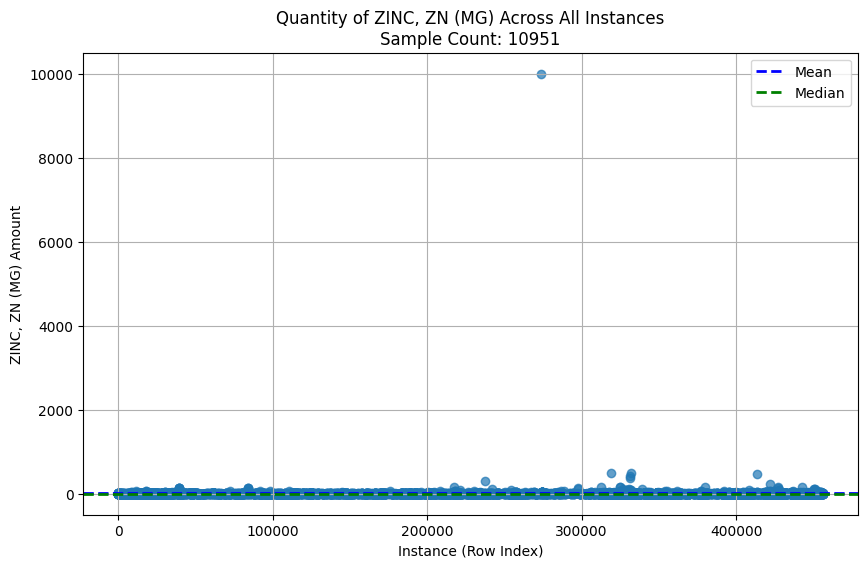

Nutrient: ZINC, ZN (MG)
Mean: 6.75
Median: 3.16
Mode: 0.00
Min: 0.00
Max: 10000.00
Standard Deviation: 96.59
Sample Count: 10951
------------------------------------------------------------------------------------------------------------------


In [6]:
# display scatterplot of the nutrient data along with some basic information for each nutrient

nutrient_columns = df.loc[:, 'FOOD_INGREDIENTS':].columns[1:]

for column in nutrient_columns:
    nutrient_data = df[column].dropna()
    nutrient_data = pd.to_numeric(nutrient_data, errors='coerce').dropna()
    
    if not nutrient_data.empty:
        mean = nutrient_data.mean()
        median = nutrient_data.median()
        mode = nutrient_data.mode()[0] if not nutrient_data.mode().empty else None
        min_value = nutrient_data.min()
        max_value = nutrient_data.max()
        std_dev = nutrient_data.std()
        sample_count = len(nutrient_data)
        
        if pd.notna(min_value) and pd.notna(max_value):
            # Plot the scatterplot
            plt.figure(figsize=(10, 6))
            plt.scatter(nutrient_data.index, nutrient_data, alpha=0.7)
            plt.axhline(mean, color='blue', linestyle='dashed', linewidth=2, label='Mean')
            plt.axhline(median, color='green', linestyle='dashed', linewidth=2, label='Median')
            plt.title(f'Quantity of {column} Across All Instances\nSample Count: {sample_count}')
            plt.xlabel('Instance (Row Index)')
            plt.ylabel(f'{column} Amount')
            plt.legend()
            plt.grid(True)
            
            plt.show()
            
            print(f'Nutrient: {column}')
            print(f'Mean: {mean:.2f}')
            print(f'Median: {median:.2f}')
            print(f'Mode: {mode:.2f}' if mode is not None else 'Mode: None')
            print(f'Min: {min_value:.2f}')
            print(f'Max: {max_value:.2f}')
            print(f'Standard Deviation: {std_dev:.2f}')
            print(f'Sample Count: {sample_count}')
            print('-' * 114)

In [7]:
# view top n quantity samples for each nutrient, including the corresponding food_record_id, and additional data

non_nutrient_columns = df.loc[:, :'FOOD_INGREDIENTS'].columns.tolist()
n = 1000

nutrient_stats = []

for column in df.columns:
    if column not in non_nutrient_columns:
        nutrient_data = df[['FOOD_ID', column]].dropna(subset=[column])
        nutrient_data[column] = pd.to_numeric(nutrient_data[column], errors='coerce').dropna()
        
        if not nutrient_data.empty:
            mean = nutrient_data[column].mean()
            median = nutrient_data[column].median()
            mode = nutrient_data[column].mode()[0] if not nutrient_data[column].mode().empty else None
            min_value = nutrient_data[column].min()
            top_n = nutrient_data.nlargest(n, column)

            top_n_values = top_n[column].tolist()
            top_n_food_ids = top_n['FOOD_ID'].tolist()
            
            sample_count = len(nutrient_data)
            
            nutrient_stats.append({
                "Nutrient": column,
                "Mean": mean,
                "Median": median,
                "Mode": mode,
                "Top Values": top_n_values,
                "Associated FOOD_IDs": top_n_food_ids,
                "Min": min_value,
                "Sample Count": sample_count
            })

sorted_nutrient_stats = sorted(nutrient_stats, key=lambda x: x["Sample Count"], reverse=True)

for stats in sorted_nutrient_stats:
    print(f'Nutrient: {stats["Nutrient"]}')
    print(f'Mean: {stats["Mean"]:.2f}')
    print(f'Median: {stats["Median"]:.2f}')
    print(f'Mode: {stats["Mode"]:.2f}' if stats["Mode"] is not None else 'Mode: None')
    print(f'Top {n} Highest Values: {stats["Top Values"]}')
    print(f'Associated FOOD_IDs: {stats["Associated FOOD_IDs"]}')
    print(f'Min: {stats["Min"]:.2f}')
    print(f'Sample Count: {stats["Sample Count"]}')
    print('-' * 114)

Nutrient: PROTEIN (G)
Mean: 7.30
Median: 4.56
Mode: 0.00
Top 1000 Highest Values: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.34, 94.12, 93.75, 93.33, 93.33, 93.33, 91.67, 90.91, 90.91, 90.91, 90.91, 90.91, 90.91, 90.91, 90.62, 90.0, 90.0, 90.0, 90.0, 90.0, 89.29, 89.29, 89.29, 88.89, 88.89, 88.76, 88.24, 87.8, 87.5, 87.5, 87.5, 87.5, 87.5, 87.5, 87.5, 87.5, 87.5, 87.5, 87.5, 87.5, 87.5, 86.96, 86.67, 86.67, 86.67, 86.67, 86.36, 86.36, 86.21, 85.84, 85.84, 85.81, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.71, 85.19, 85.19, 85.19, 85.19, 84.87, 84.62, 84.51, 84.21, 84.0, 83.61, 83.61, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33,